# **Sentiment Analysis of Hilton Hotel London Reviews**

---

## **1. Business Objectives**

Online Hilton Hotel reviews are currently found on tripadvisor, trustpilot, and expedia. The majority of reviewers gave a score between 3 and 5, so if a new customer browses online reviews on any of the previously mentioned review sites, they may consider booking a room at the Hilton.


Opinions are shared constantly on social media platforms, and are read by their followers. The knowledge, of what these followers think about our hotel, from reading these online posts, could help us better understand the general public's perception of our hotel.

So by using Sentiment Analysis on existing hotel reviews, I created a model that can quantify on a scale of 1-5, how the feels about the hotel, and as a result, also how the readers think about it. If a review classifies to be less than a score of 3, the review could be looked into, find out why they had a negative opinion, and in return seek recommendations and fix the problem.



## **2. Data Collection**

The data was downloaded from Github.

The 5 Hilton hotels with the highest number of reviews were chosen to scrape data: London Gatwick Airport, London Metropole, London Euston, London Croydon, and London - West End.

Between these 5 hotels there were 17538 reviews, from which a sample of 5000 reviews was scraped for analysis.

The root URL used was : [TripAdvisor UK](https://www.tripadvisor.co.uk/)


In [ ]:
# Connecting to Google drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Setting up some parameters for the workbook

pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (25, 5)
sns.set_context('poster')

In [ ]:
# Importing utility libraries

import re
import ast
from wordcloud import WordCloud, STOPWORDS
import pickle
import json
import joblib

In [ ]:
# Importing NLP utility libraries

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Downloading the stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from yellowbrick.model_selection import feature_importances

from tensorflow import keras
from keras.preprocessing import sequence
from tensorflow.python.keras import Sequential
from keras.models import load_model
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

import pickle

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modelling.

In [ ]:
# Loading the dataset

file_path = "/content/drive/MyDrive/Dataset/Hilton Hotel London Reviews/tripadvisor_scraped_hotel_reviews.csv"

raw_data = pd.read_csv(file_path)

In [ ]:
# Checking the features and no. of records in the dataset

print("The number of records are : ", raw_data.shape[0])
print("The number of features are : ", raw_data.shape[1])
print("The list of features is : ", raw_data.columns)
raw_data.head()

The number of records are :  35078
The number of features are :  5
The list of features is :  Index(['hotel_name', 'review_summary', 'review_p1', 'review_p2', 'score'], dtype='object')


hotel_name  \
0  Hotel Hilton London Gatwick Airport   
1  Hotel Hilton London Gatwick Airport   
2  Hotel Hilton London Gatwick Airport   
3  Hotel Hilton London Gatwick Airport   
4  Hotel Hilton London Gatwick Airport   

                                    review_summary  \
0                                         Awful...   
1                           Great start to hokidat   
2                           A good overnight stay!   
3                      Satisfactory one night stay   
4  Still nice but looking a bit sad, old and dated   

                                           review_p1  \
0  Its hard to find words that can describe this ...   
1  Staying in a hotel that’s part of the airport ...   
2  My wife and I stayed at this hotel for one nig...   
3  One night  stay which turned out to be much be...   
4  We had an executive room and even these are st...   

                                           review_p2  \
0   its just all a bit 'run down'  Poor food, not...   
1                                                NaN   
2   flat-screen TV (with a huge selection of TV c...   
3   so higher prices are expected. Overall a very...   
4                                                NaN   

                                              score  
0  <span class="ui_bubble_rating bubble_10"></span>  
1  <span class="ui_bubble_rating bubble_50"></span>  
2  <span class="ui_bubble_rating bubble_50"></span>  
3  <span class="ui_bubble_rating bubble_40"></span>  
4  <span class="ui_bubble_rating bubble_40"></span>

Observations:

The no. of records are 35078 with 5 features. We need to clean this raw scraped data now.

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.


In [ ]:
# Checking for duplicates

print("No. of duplicates records in the raw dataset : ", raw_data.duplicated().sum())

No. of duplicates records in the raw dataset :  17536


In [ ]:
print("The basic info about the raw data is : \n")
raw_data.info()

The basic info about the raw data is : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35078 entries, 0 to 35077
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hotel_name      35078 non-null  object
 1   review_summary  17538 non-null  object
 2   review_p1       17538 non-null  object
 3   review_p2       4698 non-null   object
 4   score           17538 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


#### **3.1.1 Handling Missing Values**

Identifying the features that have some missing values and imputing them.

In [ ]:
# Dropping rows where "review_p1" is missing

raw_data.dropna(subset=['review_p1'], axis=0, inplace=True)

In [ ]:
# Checking the updated no. of records

print("The number of records are : ", raw_data.shape[0])

The number of records are :  17538


Observations:

There were double the number of rows compared to the number of reviews scraped. There were null rows with only hotel_name and no other values, so those rows were removed, bringing no. of rows back to the expected 17538.

In [ ]:
# Filling the missing value as blank. The missing value of this feature means that the entire review was captured in the feature "review_p2"
raw_data["review_p2"].fillna(value='', inplace=True)

# Combining the review from the review_p1 and review_p2
raw_data["review"] = raw_data["review_p1"].astype(str) + raw_data["review_p2"].astype(str)

In [ ]:
# Checking a review from the data

raw_data["review"][0]

"Its hard to find words that can describe this experience without being too dismissive so i'll keep it short.  Pros. - Check experience was fine.... The checkin clerk was funny and helpful, and had a lovely manner with the guests. Very efficient. - Location... Very well set for access to Gatwick airport, with a short walk to the terminal for your flights.  Cons - Food...  the hotel not only was packed full and the restaurants were full, but the food itself was incredibly poor and expensive.   We did the buffet... on the evening.... barely anything was truly good tasting..... AVOID - Comfort... Hiltons of late seem to be less and less comfortable, the rooms stark... and without any character. Not the cleanest of rooms either. - its a big hotel.... everywhere is a lengthy walk and its just all a bit 'run down'  Poor food, not the best night sleep, expensive for what it is, tired and in need of significant change.  AVOID!"

#### **3.1.2 Feature Cleaning**

Dropping unnecessary feature and preparing a cleaner version of the data.

In [ ]:
# Checking a score value to extract the score given by the reviewer

raw_data["score"][0]

'<span class="ui_bubble_rating bubble_10"></span>'

In [ ]:
# Extracted the rating score given by the reviewer

raw_data["score"] = raw_data["score"].astype(str).apply(lambda x: x[37]).astype(int)

In [ ]:
# Reset the index of the df

raw_data.reset_index(inplace=True, drop=True)

In [ ]:
# Dropping "review_p1" and "review_p2"

raw_data = raw_data.drop(labels=["review_p1", "review_p2"], axis=1)

In [ ]:
# Re-ordering the features

raw_data = raw_data[["hotel_name", "review_summary", "review", "score"]]

In [ ]:
# Checking the basic info about the dataset

print("The basic info about the raw data is : \n")
raw_data.info()

The basic info about the raw data is : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17538 entries, 0 to 17537
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hotel_name      17538 non-null  object
 1   review_summary  17538 non-null  object
 2   review          17538 non-null  object
 3   score           17538 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 548.2+ KB


In [ ]:
raw_data.head()

hotel_name  \
0  Hotel Hilton London Gatwick Airport   
1  Hotel Hilton London Gatwick Airport   
2  Hotel Hilton London Gatwick Airport   
3  Hotel Hilton London Gatwick Airport   
4  Hotel Hilton London Gatwick Airport   

                                    review_summary  \
0                                         Awful...   
1                           Great start to hokidat   
2                           A good overnight stay!   
3                      Satisfactory one night stay   
4  Still nice but looking a bit sad, old and dated   

                                              review  score  
0  Its hard to find words that can describe this ...      1  
1  Staying in a hotel that’s part of the airport ...      5  
2  My wife and I stayed at this hotel for one nig...      5  
3  One night  stay which turned out to be much be...      4  
4  We had an executive room and even these are st...      4

#### **3.1.3 Data Sampling**

Sampling a subset of data for further analysis.

In [ ]:
# Groubying the data wrt "Score" to get some insights on the count of reviews per rating score

scores = pd.DataFrame(raw_data.groupby("score").size().sort_values(ascending=False)).reset_index()
scores.rename(columns={0:'count'}, inplace=True)
scores

score  count
0      4   5364
1      3   4149
2      5   3787
3      2   2357
4      1   1881

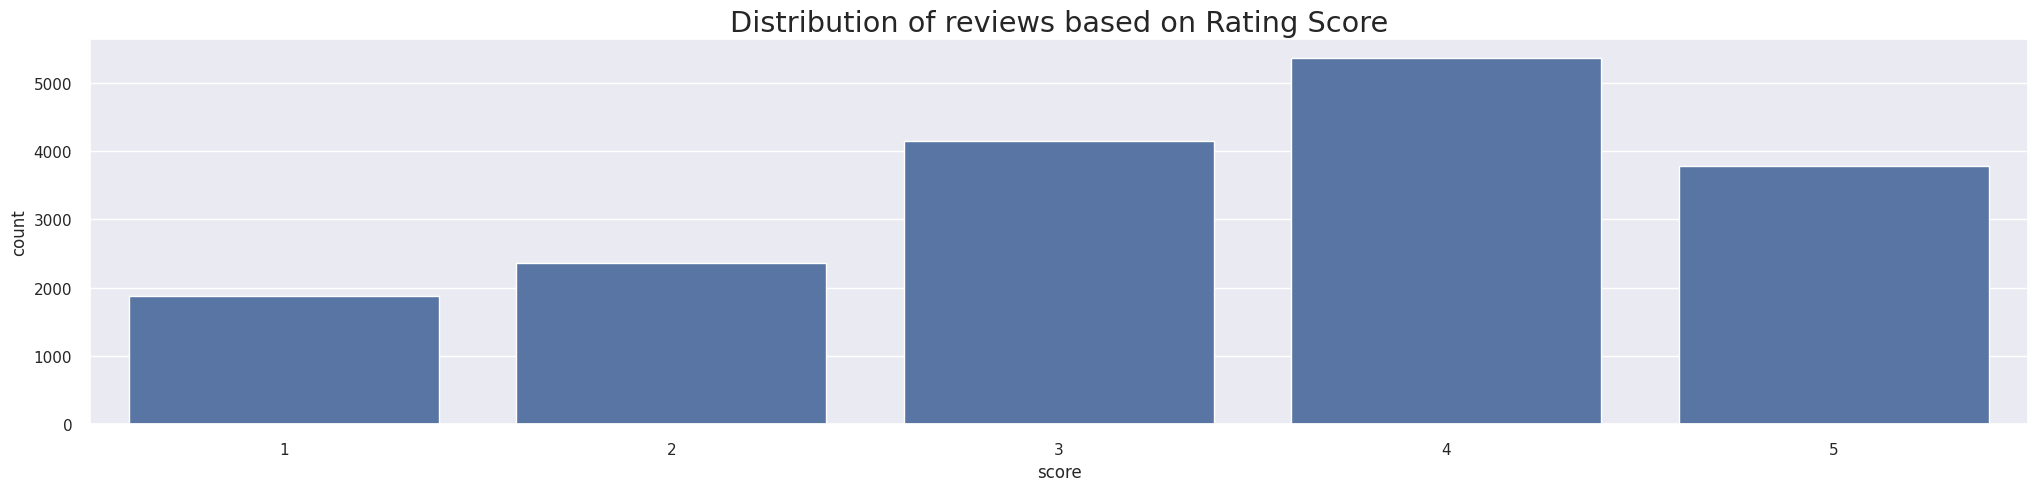

In [ ]:
# Plotting a barplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5))

sns.barplot(x="score", y="count", data=scores, ax=axes)
plt.title("Distribution of reviews based on Rating Score", fontsize='xx-large')
plt.show()

Observations:

Since the objective of this project emphasizes on the use of classification models so in order to get reliable results, the class imbalance balance needs to be addressed.

From this visualisation it is evident that there were much less reviews with a score of 1 compared to reviews with a score of 3, 4, and 5. So a random sampling of reviews needs to be done in order to extract limit the reviews of each score to the count of score 1.

In [ ]:
# Counting the count of reviews of score = 1

minority_class_len = len(raw_data[raw_data["score"] == 1])
print("The count of minority class reviews are :", minority_class_len)

The count of minority class reviews are : 1881


In [ ]:
# Getting the indexes for the different review rating score

score_1_class_indices = raw_data[raw_data["score"] == 1].index
score_2_class_indices = raw_data[raw_data["score"] == 2].index
score_3_class_indices = raw_data[raw_data["score"] == 3].index
score_4_class_indices = raw_data[raw_data["score"] == 4].index
score_5_class_indices = raw_data[raw_data["score"] == 5].index

In [ ]:
# Random sampling for the rating score 2, 3, 4 and 5 to match the count of score 1

random_score_2_class_indices = np.random.choice(score_2_class_indices, minority_class_len, replace=False)
random_score_3_class_indices = np.random.choice(score_3_class_indices, minority_class_len, replace=False)
random_score_4_class_indices = np.random.choice(score_4_class_indices, minority_class_len, replace=False)
random_score_5_class_indices = np.random.choice(score_5_class_indices, minority_class_len, replace=False)

In [ ]:
# Concatenating the indexes

under_sample_indices = np.concatenate([score_1_class_indices,random_score_2_class_indices,random_score_3_class_indices,random_score_4_class_indices,random_score_5_class_indices])

In [ ]:
# Sampled the reviews

raw_data = raw_data.loc[under_sample_indices]

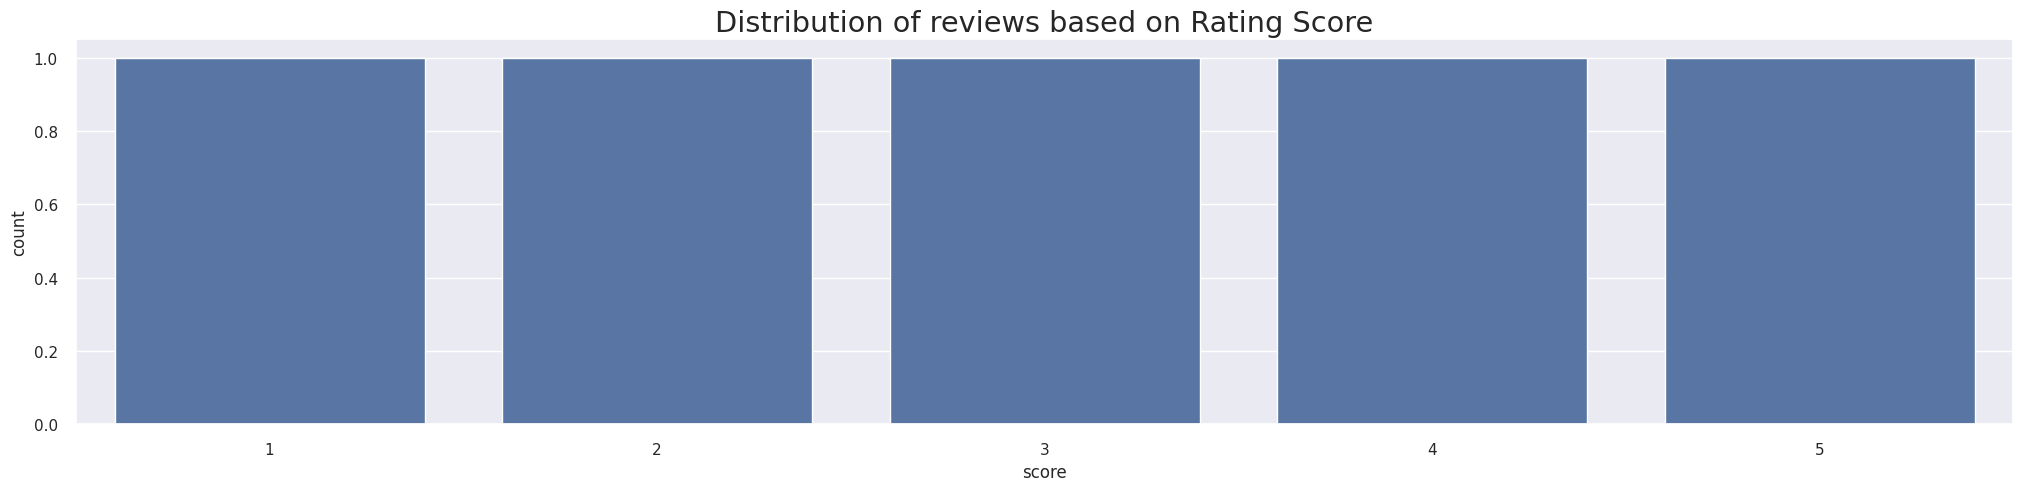

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5))

sns.countplot(x="score", data=scores, ax=axes)
plt.title("Distribution of reviews based on Rating Score", fontsize='xx-large')
plt.show()

#### **3.1.4 Saving the Data**

Saving the cleaner and under-sampled version of the data for further usage.

In [ ]:
# Saving the cleaned data to drive

path = "/content/drive/MyDrive/Dataset/Hilton Hotel London Reviews"

raw_data.to_csv(path + "/hotel_reviews_structured.csv", index=False)

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, EDA will be performed on the dataset to discover patterns and relationships that will help in understanding the data better.

In [ ]:
# Loading the dataset

file_path = "/content/drive/MyDrive/Dataset/Hilton Hotel London Reviews/hotel_reviews_structured.csv"

reviews_data = pd.read_csv(file_path)

In [ ]:
# Checking the features and no. of records in the portfolio dataset

print("The number of records are : ", reviews_data.shape[0])
print("The number of features are : ", reviews_data.shape[1])
print("The list of features is : ", reviews_data.columns)
reviews_data.head()

The number of records are :  9405
The number of features are :  4
The list of features is :  Index(['hotel_name', 'review_summary', 'review', 'score'], dtype='object')


hotel_name                   review_summary  \
0  Hotel Hilton London Gatwick Airport                         Awful...   
1              Hilton London Metropole                        Terrible    
2                 Hilton London Euston   Double deposit taken from bank   
3              Hilton London Metropole              Super disappointed!   
4              Hilton London Metropole  Dissatisfied Hilton gold number   

                                              review  score  
0  Its hard to find words that can describe this ...      1  
1  Absolutely terrible. Cracked ceiling, tiny roo...      1  
2  Very disappointed firstly i checked in online ...      1  
3  First of all we arrived wanting to park at the...      1  
4  Hello,  I currently staying @ Hilton Metropole...      1

Observations:

1. There are 9407 reviews in the dataset.
2. There are 4 features : hotel_name, review_summary, review, score

##### **1. Visualizing Count of reviews for each Hotel**

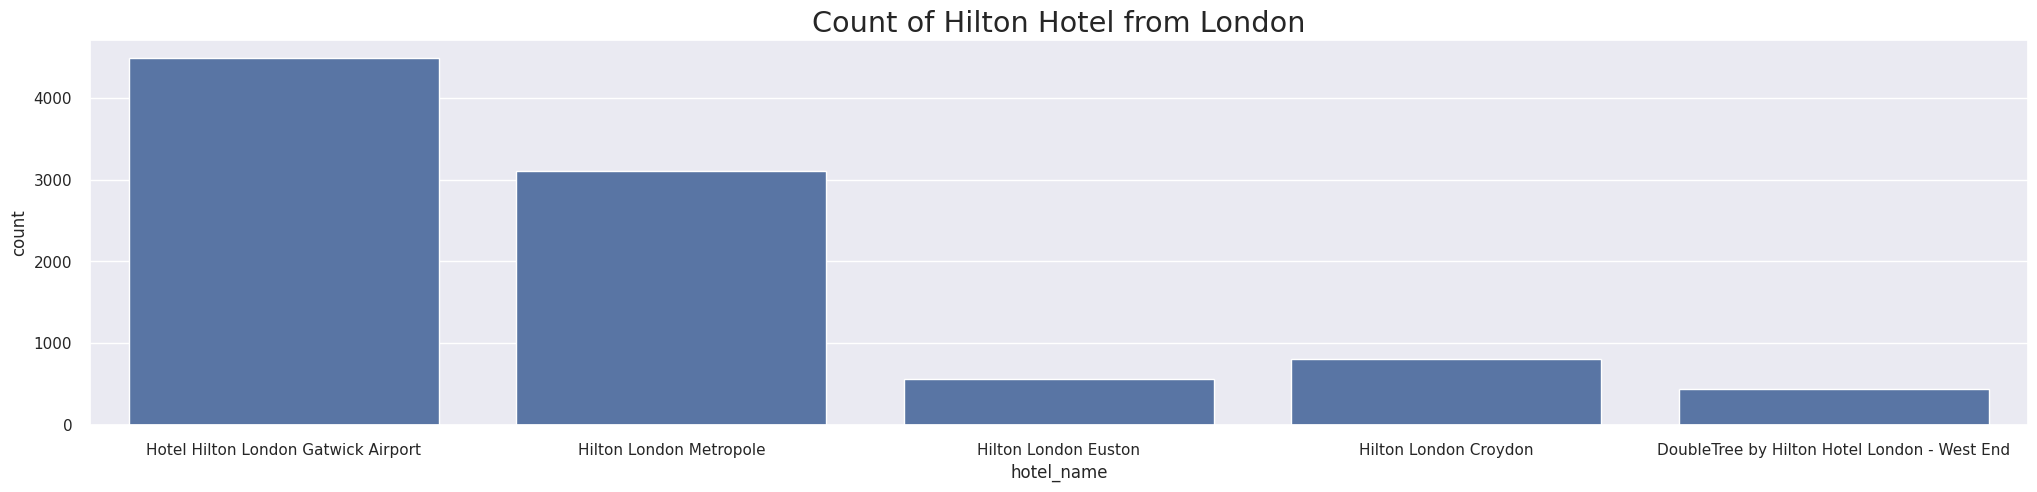

In [ ]:
# Plotting a countplot to visualize the distribution of hotels

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5))

sns.countplot(x="hotel_name", data=reviews_data, ax=axes)
plt.title("Count of Hilton Hotel from London", fontsize='xx-large')
plt.show()

Observations:

1. There are 5 different hotels available in the dataset.
2. "Hotel Hilton London Gatwick Airport" has the highest count of reviews in the data followed by "Hilton London Metropole".

##### **2. Visualizing distibution of rating score for each Hotel**

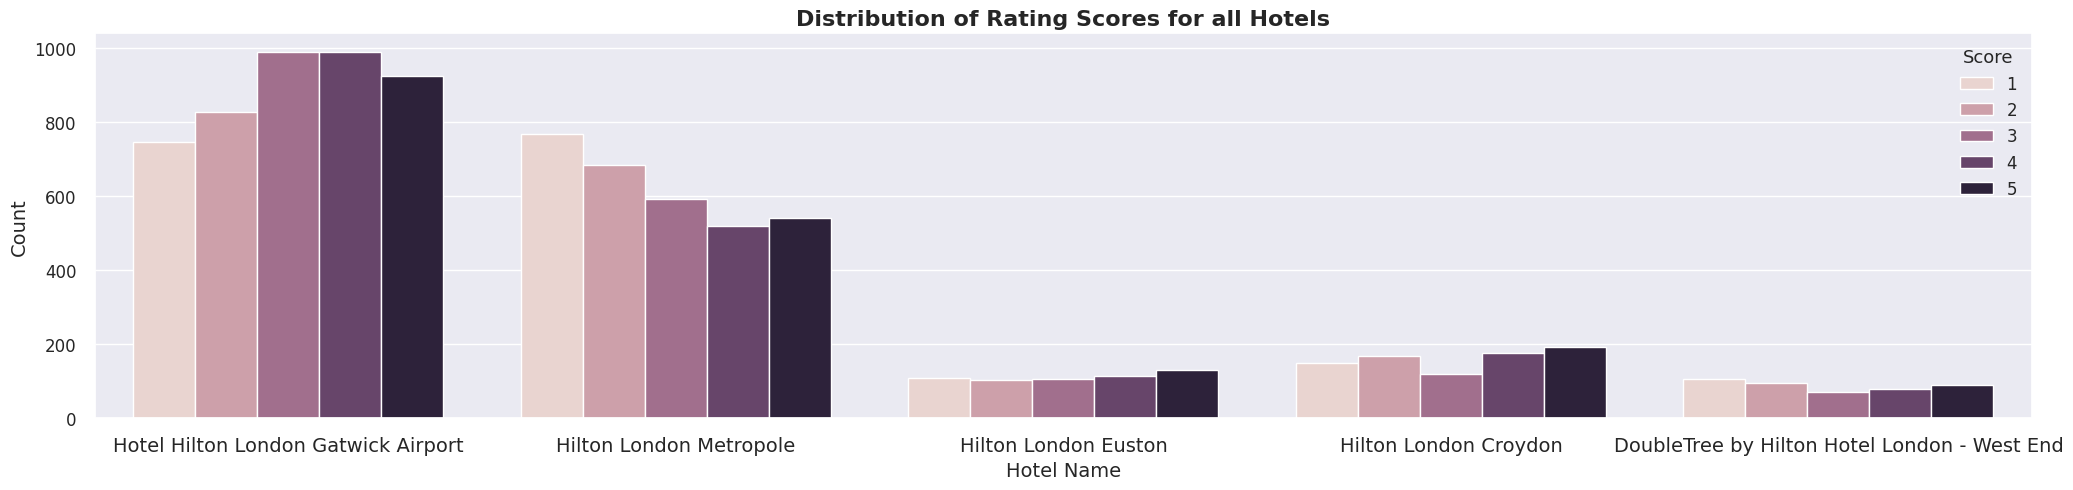

In [ ]:
# Plotting a countplot to visualize the score for each hotel

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5))

sns.countplot(x="hotel_name", hue="score", data=reviews_data, ax=axes)
plt.title("Distribution of Rating Scores for all Hotels", fontsize=16, fontweight='bold')
axes.tick_params(axis='x', labelsize=14)
axes.tick_params(axis='y', labelsize=12)
plt.legend(title='Score', title_fontsize='13', fontsize='12')
plt.xlabel("Hotel Name", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Observations:

1. The reviews are mostly in the region of 3-5 score.
2. For "Hilton London Metropole", there are more reviews with score less than 3 than 4 & 5, indicating a generally negative sentiment for the hotel.
3. "Hilton London Gatwick Airport" hotel have more reviews of score 4 and 5 than 1, 2 and 3.
4. Rest of the hotel also have mixed count of scores.

##### **3. Visualizing distribution of rating score**

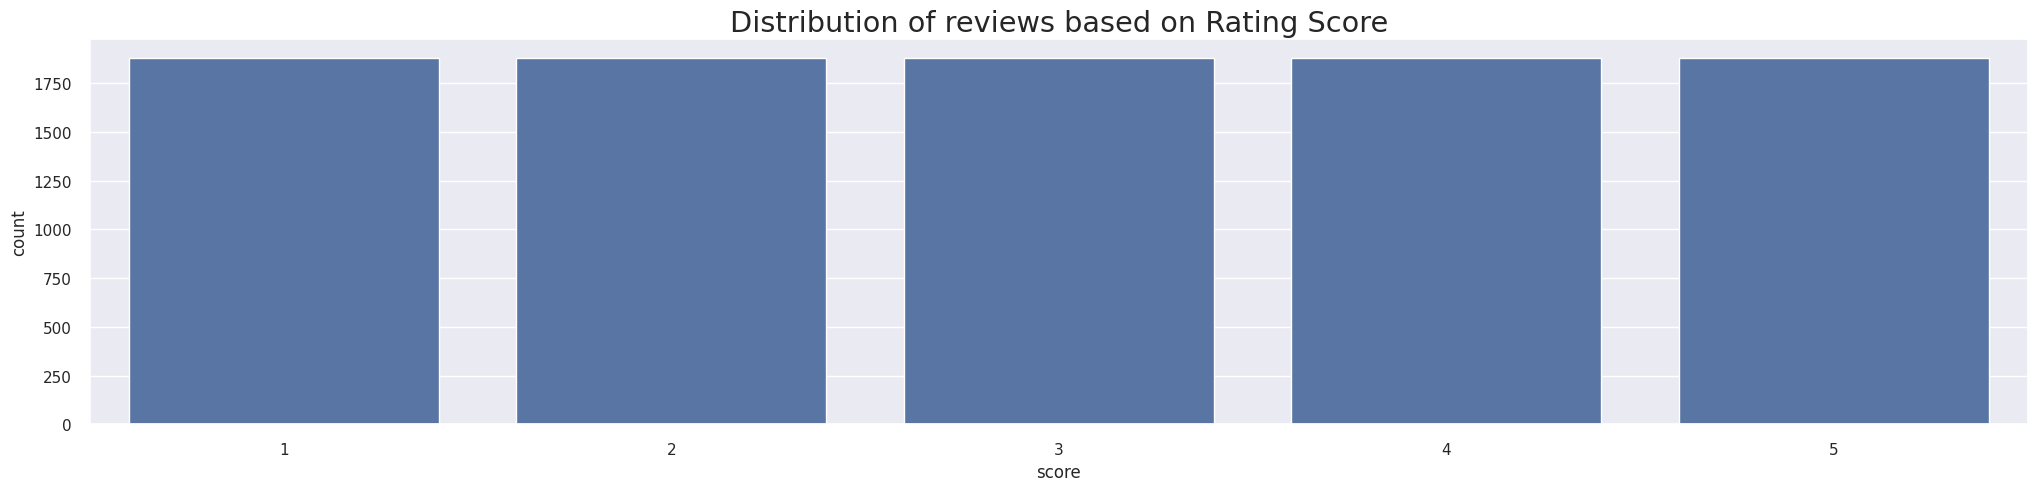

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5))

sns.countplot(x="score", data=reviews_data, ax=axes)
plt.title("Distribution of reviews based on Rating Score", fontsize='xx-large')
plt.show()

Observations:

1. As expected, we have equal representation of ratings scores.

##### **4. Exploring frequency of words in Review Summary**

In [ ]:
# Extracting all the reviews into a single string

flat_review_summary = " ".join(reviews_data["review_summary"].values)
flat_review_summary

'Awful... Terrible  Double deposit taken from bank Super disappointed! Dissatisfied Hilton gold number Wouldn’t refund even though a government ban on travel! Stay away, you can’t trust them Only sty here if nothing else is available in london Rude staff Just plain awful staff attitude !!!! Terrible Experience In desperate need of a refurb! Totally unacceptable. Filthy.  Worst hotel i have ever stayed in Avoid level 4 at any cost.. Stay clear al- staff attitude appalling Avoid at all costs...not what you’d expect from a Hilton Brand Airport stop over Building work outside of £109 room window Extremely disappointing  Needs knocking down Terrible experience  Noisy air con Avoid Work trip Shockingly poor experience  Appalling Service from Check In Manager Ruined London Trip AVOID Filthy room Appalled Beautiful hotel, but too many plastics!!  Poor standard - Poor Service Stinking mouldy room An overpriced terrible nights sleep! Bad hotel AVOID!!! No value for money, false firealarm in the 

In [ ]:
# Tokenizing all the tokens in review summary and converting them into lower-case
flat_list_review_summaries = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tokenized_reviews = tokenizer.tokenize(flat_review_summary)

for review in tokenized_reviews:
    flat_list_review_summaries.append(review.lower())

In [ ]:
# Checking the list of tokens extracted from the review summary

print("The no. of token in the review summary : ", len(flat_list_review_summaries))
print("The token in the review summary are : ", flat_list_review_summaries)

The no. of token in the review summary :  41674
The token in the review summary are :  ['awful', 'terrible', 'double', 'deposit', 'taken', 'from', 'bank', 'super', 'disappointed', 'dissatisfied', 'hilton', 'gold', 'number', 'wouldn', 't', 'refund', 'even', 'though', 'a', 'government', 'ban', 'on', 'travel', 'stay', 'away', 'you', 'can', 't', 'trust', 'them', 'only', 'sty', 'here', 'if', 'nothing', 'else', 'is', 'available', 'in', 'london', 'rude', 'staff', 'just', 'plain', 'awful', 'staff', 'attitude', 'terrible', 'experience', 'in', 'desperate', 'need', 'of', 'a', 'refurb', 'totally', 'unacceptable', 'filthy', 'worst', 'hotel', 'i', 'have', 'ever', 'stayed', 'in', 'avoid', 'level', 'at', 'any', 'cost', 'stay', 'clear', 'al', 'staff', 'attitude', 'appalling', 'avoid', 'at', 'all', 'costs', 'not', 'what', 'you', 'd', 'expect', 'from', 'a', 'hilton', 'brand', 'airport', 'stop', 'over', 'building', 'work', 'outside', 'of', 'room', 'window', 'extremely', 'disappointing', 'needs', 'knocking

In [ ]:
# Extracting the stop words in the english language

stop_words = stopwords.words("english")
stop_words.remove("not")
stop_words.remove("don't")
stop_words.remove("didn't")
stop_words.remove("doesn't")
print("The token in stop words are : ", stop_words)

The token in stop words are :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "sh

In [ ]:
# Removing stop words from the review summary list

flat_list_review_summaries_no_stop = [word for word in flat_list_review_summaries if word not in stop_words]
print("The no. of token in the review summary : ", len(flat_list_review_summaries_no_stop))
print("The token in the review summary are : ", flat_list_review_summaries_no_stop)

The no. of token in the review summary :  29204
The token in the review summary are :  ['awful', 'terrible', 'double', 'deposit', 'taken', 'bank', 'super', 'disappointed', 'dissatisfied', 'hilton', 'gold', 'number', 'refund', 'even', 'though', 'government', 'ban', 'travel', 'stay', 'away', 'trust', 'sty', 'nothing', 'else', 'available', 'london', 'rude', 'staff', 'plain', 'awful', 'staff', 'attitude', 'terrible', 'experience', 'desperate', 'need', 'refurb', 'totally', 'unacceptable', 'filthy', 'worst', 'hotel', 'ever', 'stayed', 'avoid', 'level', 'cost', 'stay', 'clear', 'al', 'staff', 'attitude', 'appalling', 'avoid', 'costs', 'not', 'expect', 'hilton', 'brand', 'airport', 'stop', 'building', 'work', 'outside', 'room', 'window', 'extremely', 'disappointing', 'needs', 'knocking', 'terrible', 'experience', 'noisy', 'air', 'con', 'avoid', 'work', 'trip', 'shockingly', 'poor', 'experience', 'appalling', 'service', 'check', 'manager', 'ruined', 'london', 'trip', 'avoid', 'filthy', 'room', 

Observations:

1. Almost 12K+ stop words were removed from the review summary list.

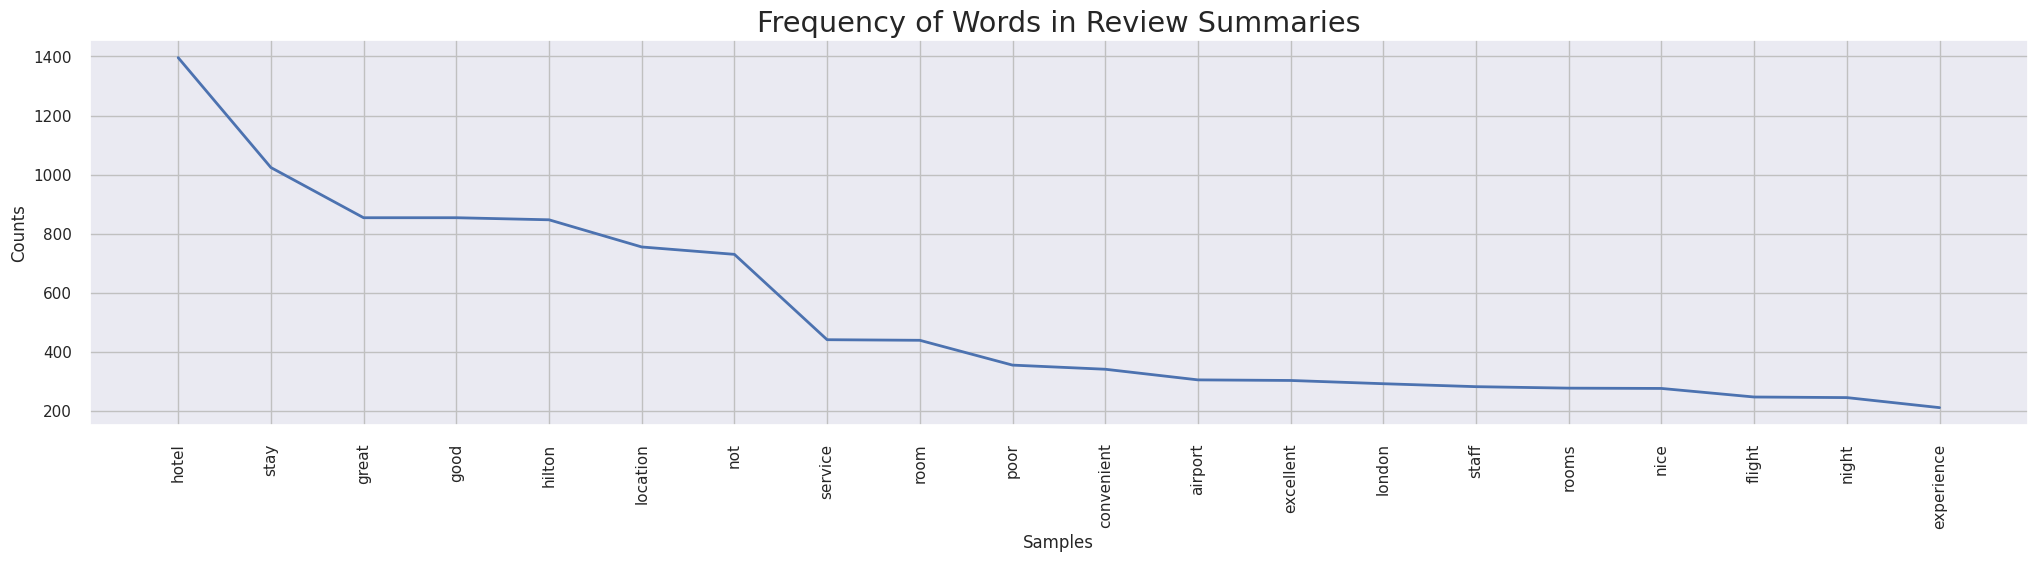

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))
plt.title("Frequency of Words in Review Summaries", fontsize='xx-large')
FreqDist(flat_list_review_summaries_no_stop).plot(20)
plt.show()

Observations:

1. Words like hotel, stay, hilton are in the top 20 frequent words.
2. Words like great, good, not, service, poor, convenient, excellent, nice and disappointing are some of the frequent words showing the sentiment of review summaries.
3. Words that do indicate the sentiment of the review summaries needs to dropped from the list.

In [ ]:
# Removing words from the review summaries that do not indicate sentiments

stop_words = stop_words + ['hotel', 'stay', 'hilton', 'location', 'room', 'service', 'airport', 'staff', 'london', 'night', 'flight', 'overnight', 'rooms']
print("The token in stop words are : ", stop_words)

The token in stop words are :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "sh

In [ ]:
# Removing the words from summary

flat_list_review_summaries_no_stop_2 =  [word for word in flat_list_review_summaries_no_stop if word not in stop_words]
print("The no. of token in the review summary : ", len(flat_list_review_summaries_no_stop_2))
print("The token in the review summary are : ", flat_list_review_summaries_no_stop_2)

The no. of token in the review summary :  22462
The token in the review summary are :  ['awful', 'terrible', 'double', 'deposit', 'taken', 'bank', 'super', 'disappointed', 'dissatisfied', 'gold', 'number', 'refund', 'even', 'though', 'government', 'ban', 'travel', 'away', 'trust', 'sty', 'nothing', 'else', 'available', 'rude', 'plain', 'awful', 'attitude', 'terrible', 'experience', 'desperate', 'need', 'refurb', 'totally', 'unacceptable', 'filthy', 'worst', 'ever', 'stayed', 'avoid', 'level', 'cost', 'clear', 'al', 'attitude', 'appalling', 'avoid', 'costs', 'not', 'expect', 'brand', 'stop', 'building', 'work', 'outside', 'window', 'extremely', 'disappointing', 'needs', 'knocking', 'terrible', 'experience', 'noisy', 'air', 'con', 'avoid', 'work', 'trip', 'shockingly', 'poor', 'experience', 'appalling', 'check', 'manager', 'ruined', 'trip', 'avoid', 'filthy', 'appalled', 'beautiful', 'many', 'plastics', 'poor', 'standard', 'poor', 'stinking', 'mouldy', 'overpriced', 'terrible', 'nights',

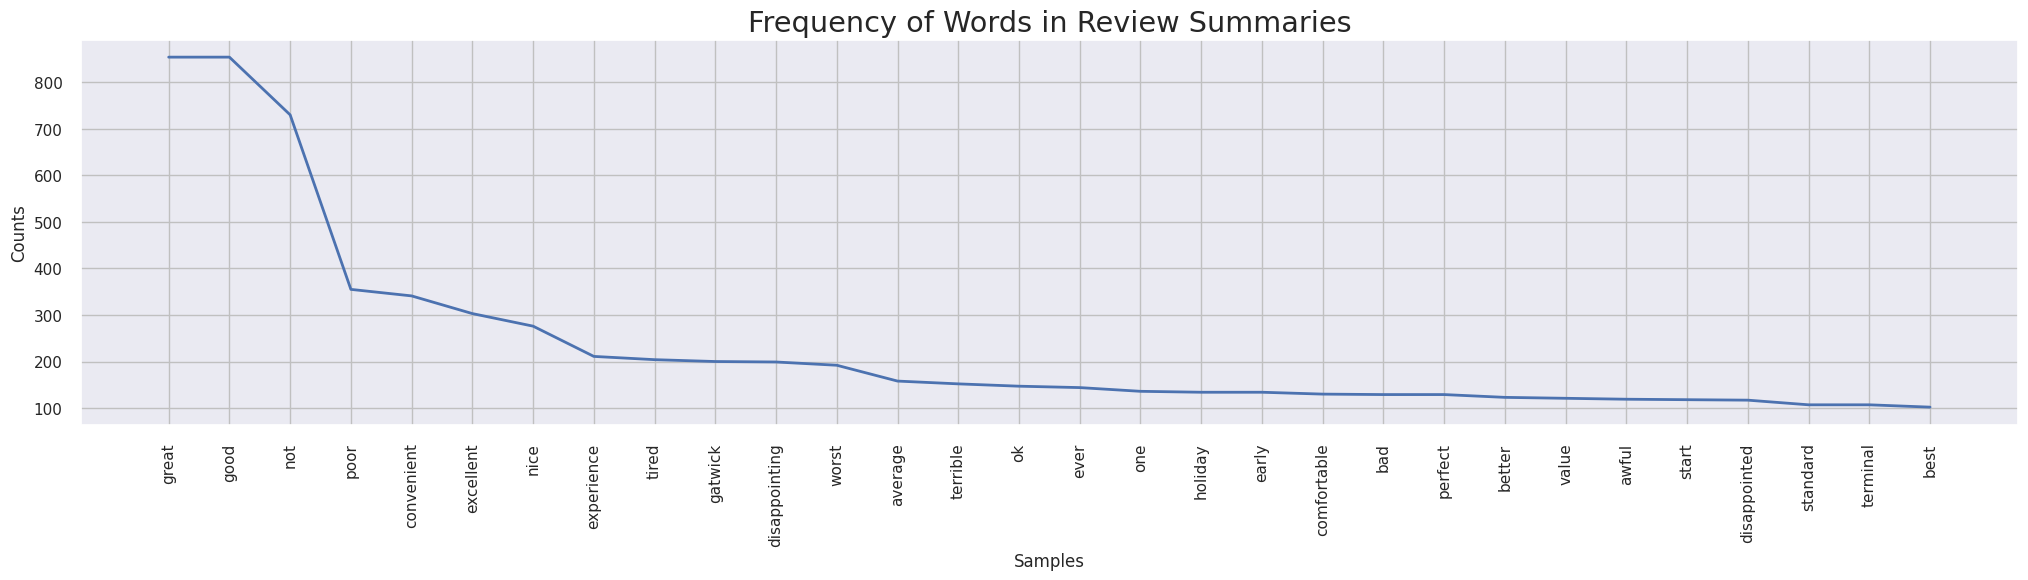

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

plt.title("Frequency of Words in Review Summaries", fontsize='xx-large')
FreqDist(flat_list_review_summaries_no_stop_2).plot(30)
plt.show()

Observations:

1. Many insignificant words were removed but there are some still left like - gatwick, early, holdiay, etc
2. These words needs to removed.

In [ ]:
# Removing words from the review summaries that do not indicate sentiments

stop_words = stop_words + ['gatwick', 'ever', 'experience', 'one', 'early', 'holiday', 'value', 'terminal', 'south']
print("The token in stop words are : ", stop_words)

The token in stop words are :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "sh

In [ ]:
# Removing the words from summary

flat_list_review_summaries_no_stop_3 =  [word for word in flat_list_review_summaries_no_stop_2 if word not in stop_words]
print("The no. of token in the review summary : ", len(flat_list_review_summaries_no_stop_3))
print("The token in the review summary are : ", flat_list_review_summaries_no_stop_3)

The no. of token in the review summary :  21177
The token in the review summary are :  ['awful', 'terrible', 'double', 'deposit', 'taken', 'bank', 'super', 'disappointed', 'dissatisfied', 'gold', 'number', 'refund', 'even', 'though', 'government', 'ban', 'travel', 'away', 'trust', 'sty', 'nothing', 'else', 'available', 'rude', 'plain', 'awful', 'attitude', 'terrible', 'desperate', 'need', 'refurb', 'totally', 'unacceptable', 'filthy', 'worst', 'stayed', 'avoid', 'level', 'cost', 'clear', 'al', 'attitude', 'appalling', 'avoid', 'costs', 'not', 'expect', 'brand', 'stop', 'building', 'work', 'outside', 'window', 'extremely', 'disappointing', 'needs', 'knocking', 'terrible', 'noisy', 'air', 'con', 'avoid', 'work', 'trip', 'shockingly', 'poor', 'appalling', 'check', 'manager', 'ruined', 'trip', 'avoid', 'filthy', 'appalled', 'beautiful', 'many', 'plastics', 'poor', 'standard', 'poor', 'stinking', 'mouldy', 'overpriced', 'terrible', 'nights', 'sleep', 'bad', 'avoid', 'money', 'false', 'firea

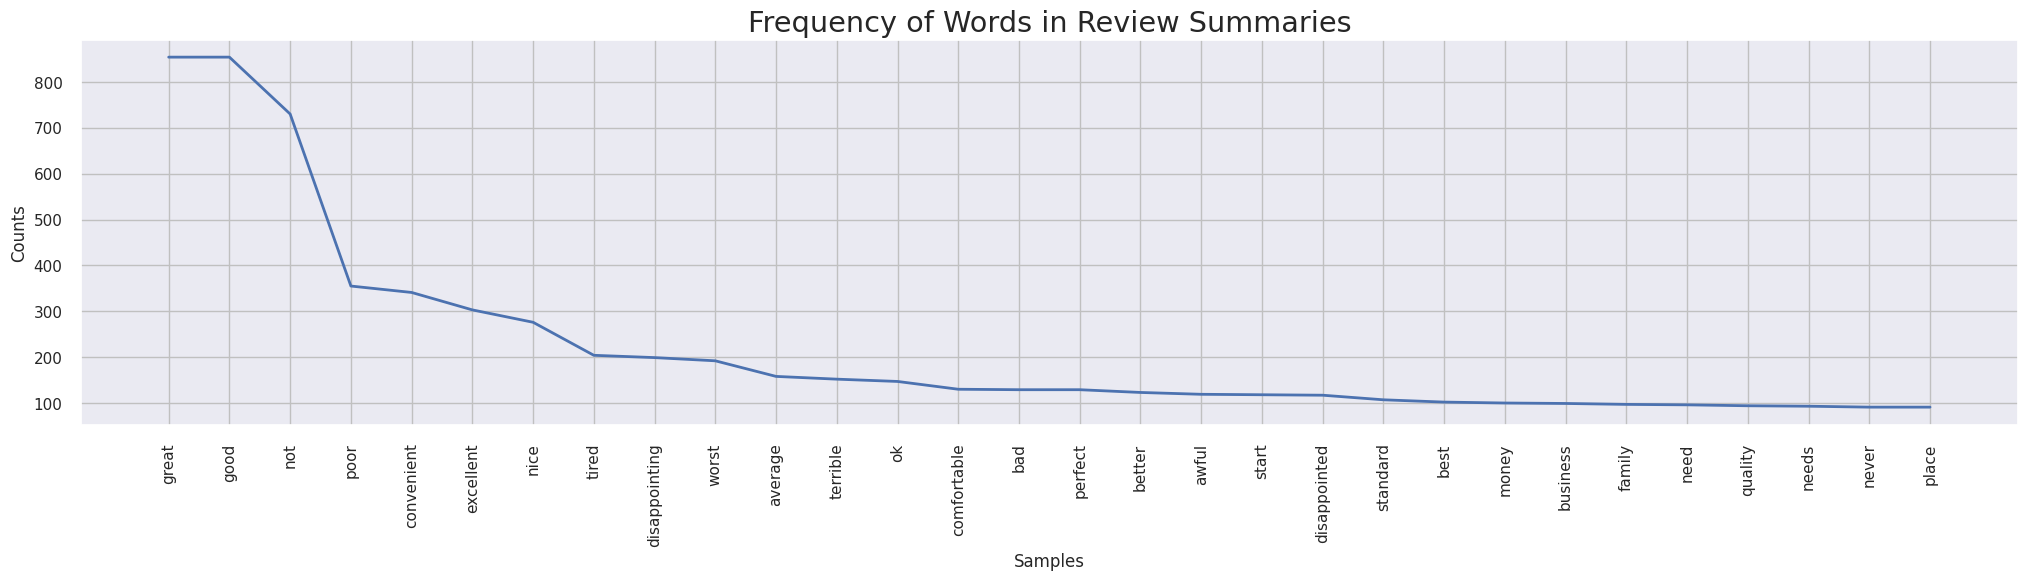

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

plt.title("Frequency of Words in Review Summaries", fontsize='xx-large')
FreqDist(flat_list_review_summaries_no_stop_3).plot(30)
plt.show()

Observations:

1. The 30 most frequent words present in the review summaries indicate a positive sentiment for most reviews.

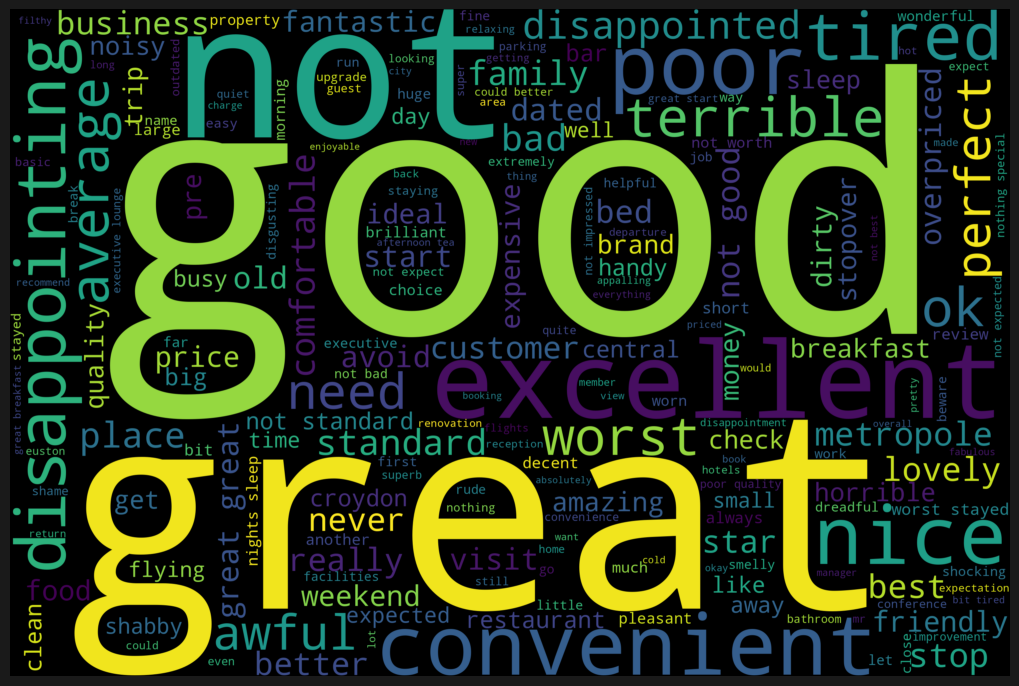

In [ ]:
# Word Cloud for Review Summaries

flat_clean_sum_str = " ".join(flat_list_review_summaries_no_stop_3)

wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = stop_words)
wordcloud.generate(flat_clean_sum_str)

plt.figure(figsize = (10,10), facecolor = 'k', edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### **5. Exploring frequency of words in Reviews**

In [ ]:
# Extracting all the reviews into a single string

flat_reviews = " ".join(reviews_data["review"].values.astype(str))
flat_reviews

'Its hard to find words that can describe this experience without being too dismissive so i\'ll keep it short.  Pros. - Check experience was fine.... The checkin clerk was funny and helpful, and had a lovely manner with the guests. Very efficient. - Location... Very well set for access to Gatwick airport, with a short walk to the terminal for your flights.  Cons - Food...  the hotel not only was packed full and the restaurants were full, but the food itself was incredibly poor and expensive.   We did the buffet... on the evening.... barely anything was truly good tasting..... AVOID - Comfort... Hiltons of late seem to be less and less comfortable, the rooms stark... and without any character. Not the cleanest of rooms either. - its a big hotel.... everywhere is a lengthy walk and its just all a bit \'run down\'  Poor food, not the best night sleep, expensive for what it is, tired and in need of significant change.  AVOID! Absolutely terrible. Cracked ceiling, tiny room, bad quality tv,

In [ ]:
# Tokenizing all the tokens in reviews and converting them into lower-case
flat_list_reviews = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tokenized_reviews = tokenizer.tokenize(flat_reviews)

for review in tokenized_reviews:
    flat_list_reviews.append(review.lower())

In [ ]:
# Checking the stop words list

print("The token in stop words are : ", stop_words)

The token in stop words are :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "sh

In [ ]:
# Filtering out the stop words

flat_list_reviews_no_stop = [word for word in flat_list_reviews if word not in stop_words]

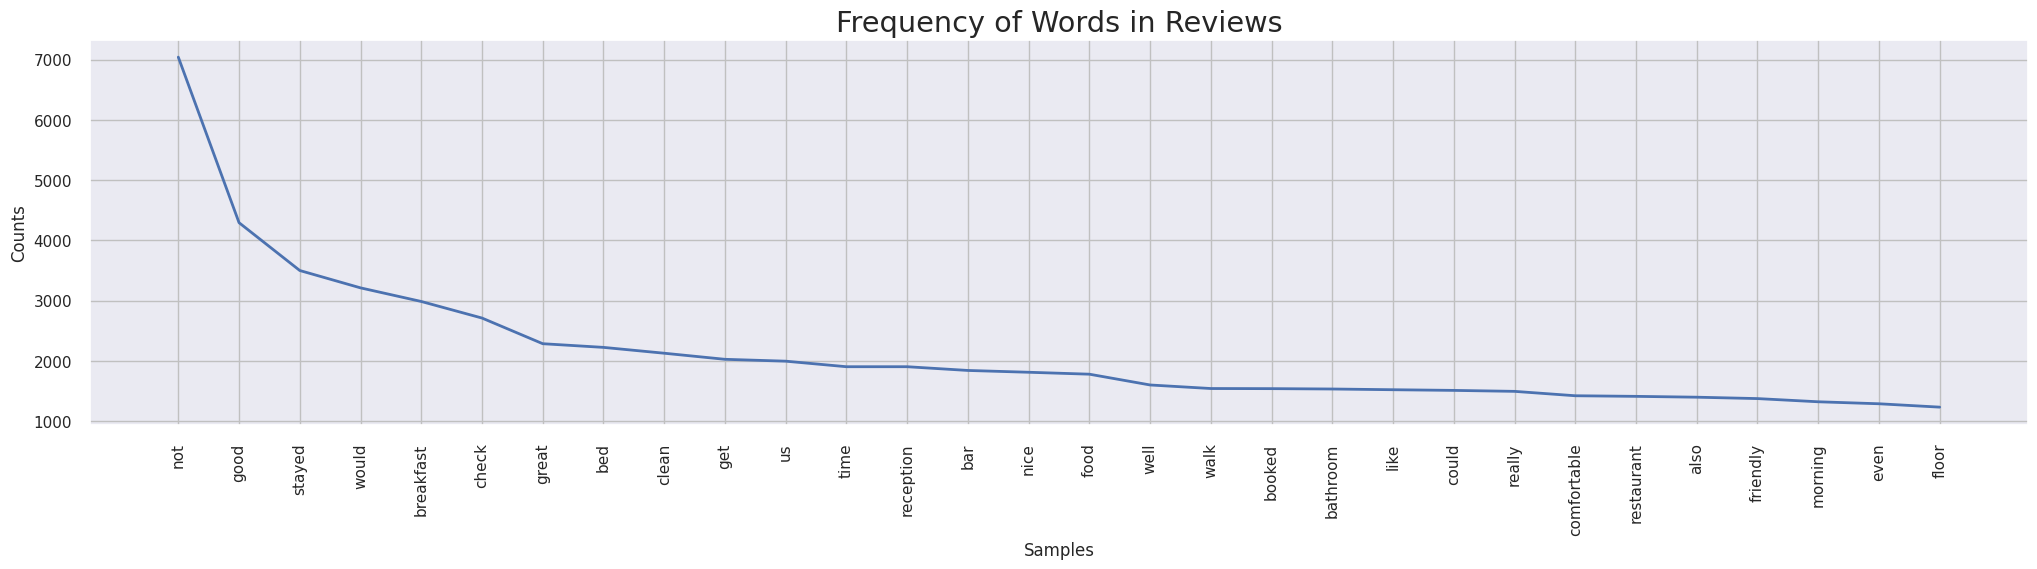

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

plt.title("Frequency of Words in Reviews", fontsize='xx-large')
FreqDist(flat_list_reviews_no_stop).plot(30)
plt.show()

Observations:

1. There are some of the insignificant words in the most common words list.
2. "not" is the most common word in the reviews.

In [ ]:
# Removing words from the reviews that do not indicate sentiments

insignificant_words = ['would', 'stayed', 'breakfast', 'check', 'get', 'us', 'bed', 'time', 'reception', 'bar', 'food', 'well', 'walk', 'booked', 'really', 'bathroom', 'could', 'also', 'morning', \
                       'restaurant', 'even', 'floor', 'next', 'back', 'day', 'two', 'got', 'however', 'executive', 'small', 'first', 'shower', 'area', 'long', 'need', 'told', 'minutes', 'much']
stop_words = stop_words + insignificant_words
print("The token in stop words are : ", stop_words)

The token in stop words are :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "sh

In [ ]:
# Filtering out the stop words

flat_list_reviews_no_stop_2 = [word for word in flat_list_reviews_no_stop if word not in stop_words]

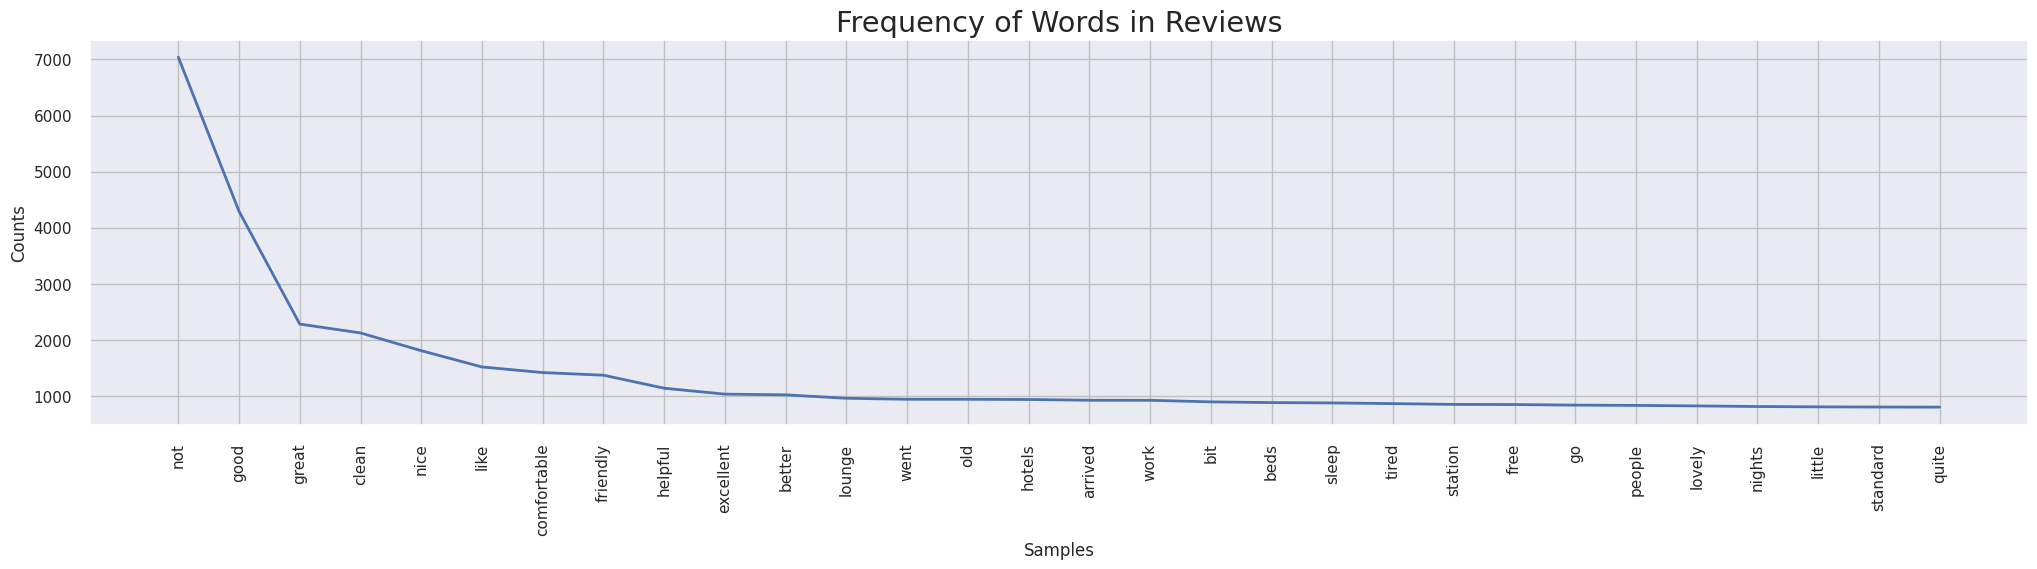

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

plt.title("Frequency of Words in Reviews", fontsize='xx-large')
FreqDist(flat_list_reviews_no_stop_2).plot(30)
plt.show()

In [ ]:
# Removing words from the reviews that do not indicate sentiments

insignificant_words = ['lounge', 'arrived', 'went', 'old', 'sleep', 'beds', 'work', 'hotels', 'station', 'tired', 'quite', 'bit', 'little', 'nights', 'go', 'large', 'people', 'family', 'around', 'desk', \
                       'car', 'asked', 'close', 'use', 'made', 'water', 'staying', 'place', 'ok', 'parking', 'way', 'buffet', ]
stop_words = stop_words + insignificant_words
print("The token in stop words are : ", stop_words)

The token in stop words are :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "sh

In [ ]:
# Filtering out the stop words

flat_list_reviews_no_stop_3 = [word for word in flat_list_reviews_no_stop_2 if word not in stop_words]

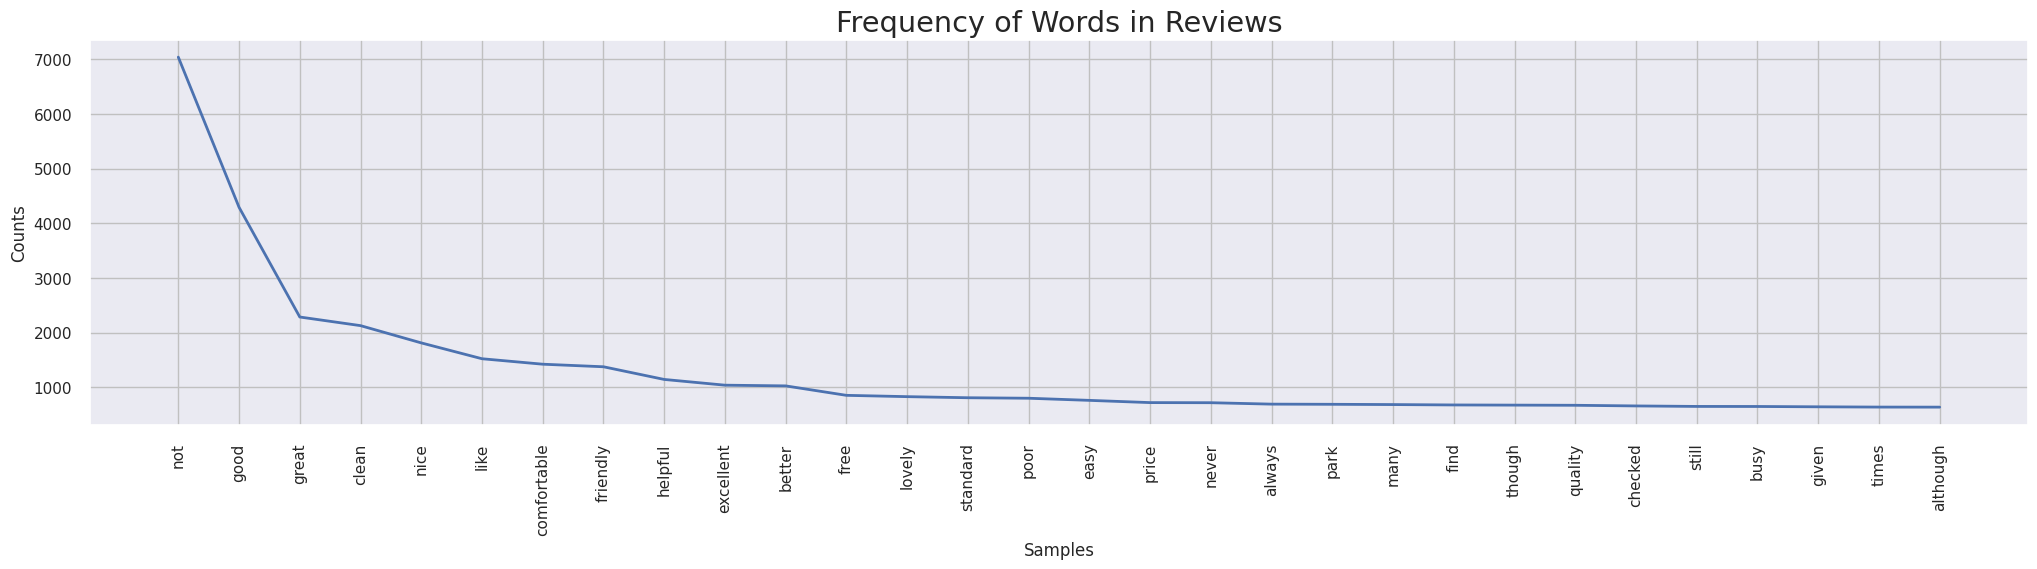

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

plt.title("Frequency of Words in Reviews", fontsize='xx-large')
FreqDist(flat_list_reviews_no_stop_3).plot(30)
plt.show()

In [ ]:
# Removing words from the reviews that do not indicate sentiments

insignificant_words = ['find', 'given', 'park', 'always', 'times', 'many', 'though', 'still', 'checked', 'away', 'although','expect', 'lobby', 'door', 'member', 'new', 'found','took', 'air', \
                       'said', 'drinks', 'big', 'wifi', 'another','enough', 'last','say', 'business', 'paid', 'going', 'access', 'booking', 'used', 'due', 'choice', 'dated', 'nothing', \
                       'upgrade', 'th', 'evening', 'tv', 'front', 'double']
stop_words = stop_words + insignificant_words
print("The token in stop words are : ", stop_words)

The token in stop words are :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "sh

In [ ]:
# Filtering out the stop words

flat_list_reviews_no_stop_4 = [word for word in flat_list_reviews_no_stop_3 if word not in stop_words]

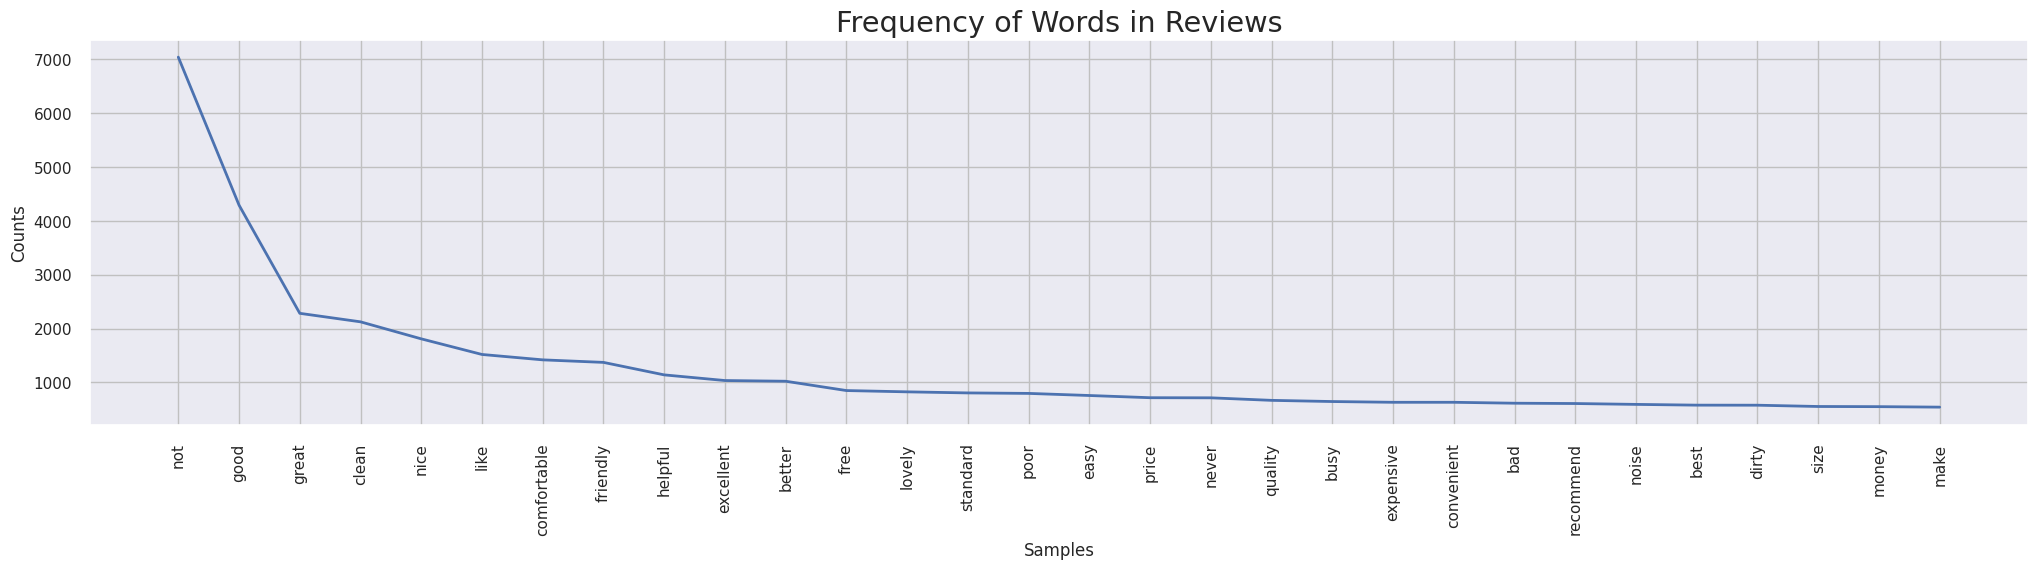

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

plt.title("Frequency of Words in Reviews", fontsize='xx-large')
FreqDist(flat_list_reviews_no_stop_4).plot(30)
plt.show()

In [ ]:
# Removing words from the reviews that do not indicate sentiments

insignificant_words = ['pm', 'hot', 'make', 'short', 'everything', 'money', 'road', 'coffee', 'size', 'looked', 'dinner', 'definitely', 'arrival', 'left', 'extremely','think', 'available', 'every', \
                       'needed', 'tube', 'right', 'want', 'see', 'offered', 'wing', 'bath', 'carpet', 'days', 'take', 'start', 'trip', 'overall', 'late', 'working', 'hours', 'put', 'restaurants']
stop_words = stop_words + insignificant_words
print("The token in stop words are : ", stop_words)

The token in stop words are :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "sh

In [ ]:
# Filtering out the stop words

flat_list_reviews_no_stop_5 = [word for word in flat_list_reviews_no_stop_4 if word not in stop_words]

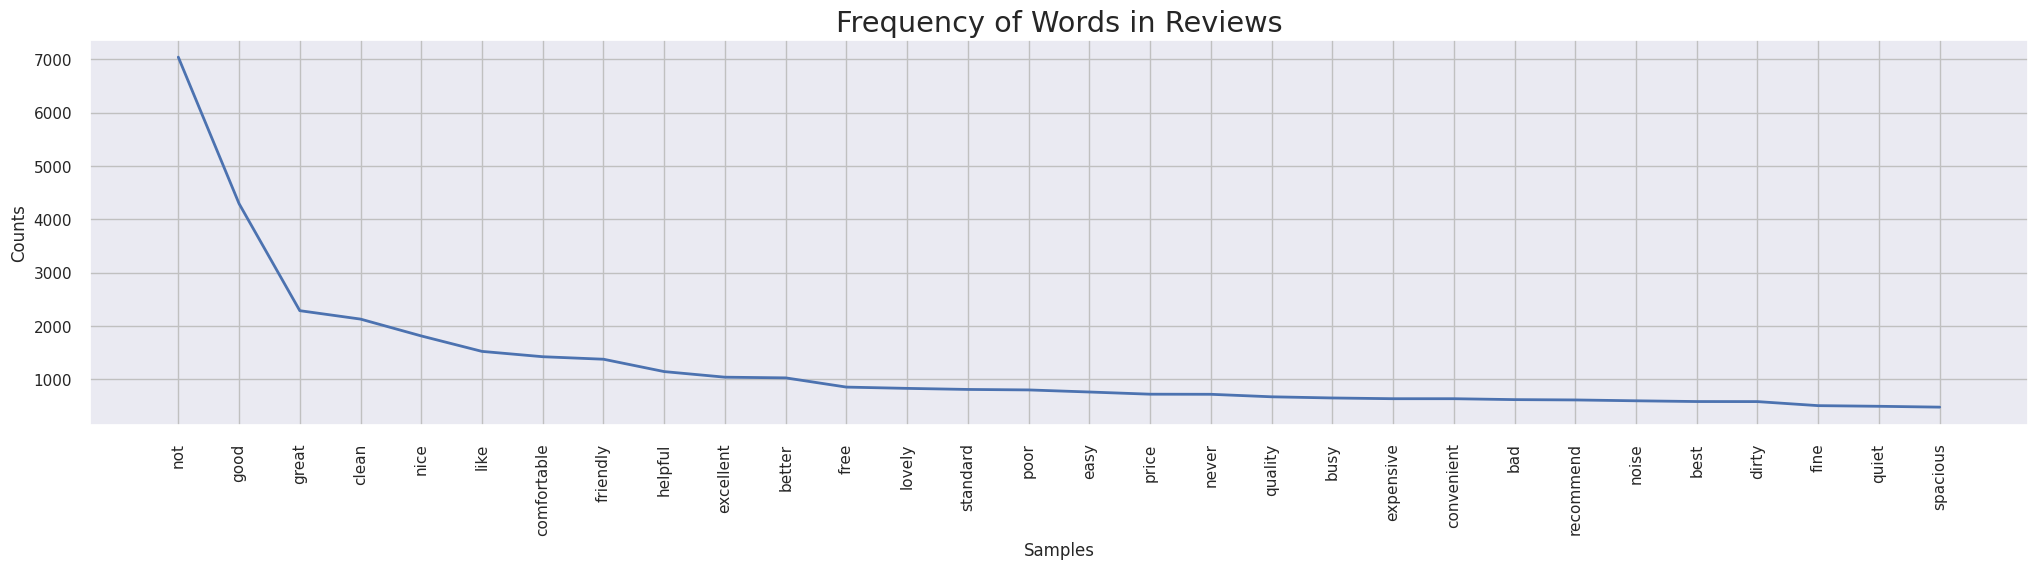

In [ ]:
# Plotting a countplot to visualize the distribution of reviews based on Rating Score

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

plt.title("Frequency of Words in Reviews", fontsize='xx-large')
FreqDist(flat_list_reviews_no_stop_5).plot(30)
plt.show()

Observations:

1. After 5 iterations, the top 30 most frequent words shows the sentiments of the reviews.
2. Words like not, good, great, clean, nice are some most common words.

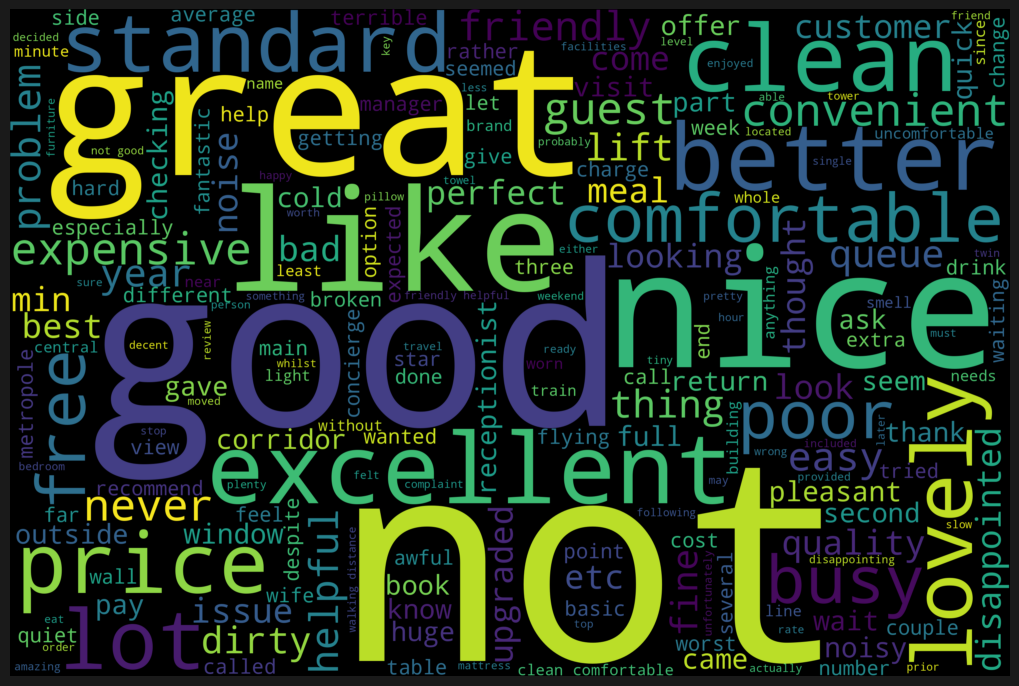

In [ ]:
# Displaying the wordcloud for reviews

flat_clean_str = " ".join(flat_list_reviews_no_stop_5)
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = stop_words)

wordcloud.generate(flat_clean_str)

plt.figure(figsize = (10, 10), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
reviews_data.head()

hotel_name                   review_summary  \
0  Hotel Hilton London Gatwick Airport                         Awful...   
1              Hilton London Metropole                        Terrible    
2                 Hilton London Euston   Double deposit taken from bank   
3              Hilton London Metropole              Super disappointed!   
4              Hilton London Metropole  Dissatisfied Hilton gold number   

                                              review  score  
0  Its hard to find words that can describe this ...      1  
1  Absolutely terrible. Cracked ceiling, tiny roo...      1  
2  Very disappointed firstly i checked in online ...      1  
3  First of all we arrived wanting to park at the...      1  
4  Hello,  I currently staying @ Hilton Metropole...      1

### **3.3 Feature Engineering**

Now that we have completed the data exploration part, we can start the Feature Engineering in order to prepare the data for the ML algorithms.

In [ ]:
# To narrow down the feature words, applying stemmation and lemmatisation to both the reviews and review summaries

stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [ ]:
# Function for applying stemming and lemmatization

def apply_stem(doc):
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '

    return stem_doc

def apply_lem(doc):
    doc_split = doc.split(' ')
    lem_n_doc = ''
    for word in doc_split:
        lem_n_doc += lemmy.lemmatize(word) + ' '

    doc_split = lem_n_doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '

    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '

    return lem_doc

In [ ]:
# Applying stemming and lemmatization on the review and review summary features

reviews_data["review_summary_stemmed"] = reviews_data["review_summary"].astype(str).apply(apply_stem)
reviews_data["review_summary_lemmed"] = reviews_data["review_summary"].astype(str).apply(apply_lem)

reviews_data["review_stemmed"] = reviews_data["review"].astype(str).apply(apply_stem)
reviews_data["review_lemmed"] = reviews_data["review"].astype(str).apply(apply_lem)

In [ ]:
review_index_to_check = 100
print("ORIGINAL REVIEW SUMMARY:",'\n', reviews_data["review_summary"].iloc[review_index_to_check],'\n')
print("ORIGINAL REVIEW:",'\n',reviews_data["review"].iloc[review_index_to_check],'\n')

print("STEMMED REVIEW SUMMARY:",'\n', reviews_data["review_summary_stemmed"].iloc[review_index_to_check],'\n')
print("STEMMED REVIEW:",'\n', reviews_data["review_stemmed"].iloc[review_index_to_check],'\n')

print("LEMMED REVIEW SUMMARY:",'\n', reviews_data["review_summary_lemmed"].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n', reviews_data["review_lemmed"].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW SUMMARY: 
 Hall 

ORIGINAL REVIEW: 
 Was ok not the greatest for what I paid for one night barely any of the restaurants shown was actually open also a woman got stuck in the lift for over an hour and they were so rude to her overall I think it’s a ridiculous hotel that needs a lot of work 

STEMMED REVIEW SUMMARY: 
 hall  

STEMMED REVIEW: 
 wa ok not the greatest for what i paid for one night bare ani of the restaur shown wa actual open also a woman got stuck in the lift for over an hour and they were so rude to her overal i think it’ a ridicul hotel that need a lot of work  

LEMMED REVIEW SUMMARY: 
 Hall    

LEMMED REVIEW: 
 Was ok not the great for what I pay for one night barely any of the restaurant show wa actually open also a woman get stick in the lift for over an hour and they be so rude to her overall I think it’s a ridiculous hotel that need a lot of work    



Observations:

1. Stemmation had broken down some words into words that don't exist, whereas lemmitisation had simplified adjectives and verbs to their root form.
2. So lemmatised version of the texts were used for further processing.



In [ ]:
# Extracting sentiment from ratings score

def Sentiment_Calculator(score):
    if score < 3:
        return 0
    else:
        return 1

reviews_data["sentiment"] = reviews_data["score"].apply(Sentiment_Calculator)

In [ ]:
reviews_data.head()

hotel_name                   review_summary  \
0  Hotel Hilton London Gatwick Airport                         Awful...   
1              Hilton London Metropole                        Terrible    
2                 Hilton London Euston   Double deposit taken from bank   
3              Hilton London Metropole              Super disappointed!   
4              Hilton London Metropole  Dissatisfied Hilton gold number   

                                              review  score  \
0  Its hard to find words that can describe this ...      1   
1  Absolutely terrible. Cracked ceiling, tiny roo...      1   
2  Very disappointed firstly i checked in online ...      1   
3  First of all we arrived wanting to park at the...      1   
4  Hello,  I currently staying @ Hilton Metropole...      1   

           review_summary_stemmed               review_summary_lemmed  \
0                       awful...                          Awful...      
1                       terribl                          Terrible       
2  doubl deposit taken from bank     Double deposit take from bank      
3            super disappointed!               Super disappointed!      
4  dissatisfi hilton gold number   Dissatisfied Hilton gold number      

                                      review_stemmed  \
0  it hard to find word that can describ thi expe...   
1  absolut terrible. crack ceiling, tini room, ba...   
2  veri disappoint firstli i check in onlin but h...   
3  first of all we arriv want to park at the hote...   
4  hello,  i current stay @ hilton metropol in lo...   

                                       review_lemmed  sentiment  
0  Its hard to find word that can describe this e...          0  
1  Absolutely terrible. Cracked ceiling, tiny roo...          0  
2  Very disappoint firstly i check in online but ...          0  
3  First of all we arrive want to park at the hot...          0  
4  Hello,  I currently stay @ Hilton Metropole in...          0

#### **3.3.1 Train/Test Splitting**

Before moving further, a train - test split needs to be done to save the train and test data for after modelling and testing respectively.



In [ ]:
# Saving the independent and dependent features and performing train-test split

X = reviews_data.drop(columns=["hotel_name", "score"])
y = reviews_data["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train.shape: ', X_train.shape, '\tX_test.shape: ', X_test.shape, '\nY_train.shape: ', y_train.shape, '\tY_test.shape: ', y_test.shape)

X_train.shape:  (7524, 7) 	X_test.shape:  (1881, 7) 
Y_train.shape:  (7524,) 	Y_test.shape:  (1881,)


#### **3.3.2 Feature Extraction**

Extracting relevant features from the data that will be used in the ML algorithms.

In [ ]:
# Creating Tf-idf Vectorizer features for "reviews"

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True, tokenizer = tokenizer.tokenize, stop_words=stop_words, ngram_range=(1,2), min_df = 0.05 )

X_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(X_train["review_lemmed"])
X_lemm_test_tfidf_sparse = tf_idf_vect.transform(X_test["review_lemmed"])

X_lemm_train_tfidf = pd.DataFrame(X_lemm_train_tfidf_sparse.toarray(), columns=tf_idf_vect.get_feature_names_out())
X_lemm_test_tfidf = pd.DataFrame(X_lemm_test_tfidf_sparse.toarray(), columns=tf_idf_vect.get_feature_names_out())

In [ ]:
# Checking the features and no. of records

print("The number of records are : ", X_lemm_train_tfidf.shape[0])
print("The number of features are : ", X_lemm_train_tfidf.shape[1])
print("The list of features is : ", X_lemm_train_tfidf.columns)

X_lemm_train_tfidf.head()

The number of records are :  7524
The number of features are :  66
The list of features is :  Index(['arrive', 'ask', 'bad', 'best', 'bite', 'book', 'busy', 'call',
       'charge', 'clean', 'come', 'comfortable', 'convenient', 'dirty',
       'drink', 'easy', 'eat', 'excellent', 'expensive', 'feel', 'fly', 'free',
       'friendly', 'give', 'good', 'great', 'guest', 'ha', 'helpful', 'hour',
       'know', 'leave', 'like', 'look', 'lot', 'lovely', 'minute', 'never',
       'nice', 'noise', 'not', 'offer', 'pay', 'poor', 'price', 'problem',
       'quality', 'queue', 'recommend', 'return', 'seem', 'spacious',
       'standard', 'tell', 'thing', 'tire', 'travel', 'try', 'u', 'visit',
       'wa', 'wa clean', 'wa good', 'wa not', 'wait', 'year'],
      dtype='object')


arrive  ask  bad  best  bite      book  busy  call  charge  clean  \
0  0.000000  0.0  0.0   0.0   0.0  0.508778   0.0   0.0     0.0    0.0   
1  0.000000  0.0  0.0   0.0   0.0  0.346908   0.0   0.0     0.0    0.0   
2  0.000000  0.0  0.0   0.0   0.0  0.235559   0.0   0.0     0.0    0.0   
3  0.000000  0.0  0.0   0.0   0.0  0.000000   0.0   0.0     0.0    0.0   
4  0.461518  0.0  0.0   0.0   0.0  0.000000   0.0   0.0     0.0    0.0   

       come  comfortable  convenient  dirty  drink  easy  eat  excellent  \
0  0.612698          0.0         0.0    0.0    0.0   0.0  0.0   0.604769   
1  0.000000          0.0         0.0    0.0    0.0   0.0  0.0   0.000000   
2  0.000000          0.0         0.0    0.0    0.0   0.0  0.0   0.000000   
3  0.000000          0.0         0.0    0.0    0.0   0.0  0.0   0.000000   
4  0.000000          0.0         0.0    0.0    0.0   0.0  0.0   0.000000   

   expensive  feel       fly      free  friendly  give      good     great  \
0        0.0   0.0  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
1        0.0   0.0  0.000000  0.439973  0.000000   0.0  0.000000  0.324986   
2        0.0   0.0  0.323921  0.000000  0.248189   0.0  0.326595  0.000000   
3        0.0   0.0  0.000000  0.000000  0.000000   0.0  0.000000  0.684093   
4        0.0   0.0  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   

   guest   ha  helpful      hour  know  leave  like      look  lot  lovely  \
0    0.0  0.0  0.00000  0.000000   0.0    0.0   0.0  0.000000  0.0     0.0   
1    0.0  0.0  0.38882  0.460098   0.0    0.0   0.0  0.000000  0.0     0.0   
2    0.0  0.0  0.00000  0.000000   0.0    0.0   0.0  0.000000  0.0     0.0   
3    0.0  0.0  0.00000  0.000000   0.0    0.0   0.0  0.000000  0.0     0.0   
4    0.0  0.0  0.00000  0.000000   0.0    0.0   0.0  0.411254  0.0     0.0   

     minute  never      nice  noise       not  offer  pay  poor  price  \
0  0.000000    0.0  0.000000    0.0  0.000000    0.0  0.0   0.0    0.0   
1  0.000000    0.0  0.000000    0.0  0.000000    0.0  0.0   0.0    0.0   
2  0.272472    0.0  0.000000    0.0  0.146915    0.0  0.0   0.0    0.0   
3  0.000000    0.0  0.729395    0.0  0.000000    0.0  0.0   0.0    0.0   
4  0.000000    0.0  0.380170    0.0  0.000000    0.0  0.0   0.0    0.0   

   problem  quality     queue  recommend  return  seem  spacious  standard  \
0      0.0      0.0  0.000000   0.000000     0.0   0.0       0.0       0.0   
1      0.0      0.0  0.000000   0.000000     0.0   0.0       0.0       0.0   
2      0.0      0.0  0.332573   0.306491     0.0   0.0       0.0       0.0   
3      0.0      0.0  0.000000   0.000000     0.0   0.0       0.0       0.0   
4      0.0      0.0  0.000000   0.000000     0.0   0.0       0.0       0.0   

   tell  thing  tire    travel  try    u  visit        wa  wa clean   wa good  \
0   0.0    0.0   0.0  0.000000  0.0  0.0    0.0  0.000000       0.0  0.000000   
1   0.0    0.0   0.0  0.000000  0.0  0.0    0.0  0.156770       0.0  0.000000   
2   0.0    0.0   0.0  0.330008  0.0  0.0    0.0  0.425802       0.0  0.284159   
3   0.0    0.0   0.0  0.000000  0.0  0.0    0.0  0.000000       0.0  0.000000   
4   0.0    0.0   0.0  0.000000  0.0  0.0    0.0  0.687999       0.0  0.000000   

   wa not      wait  year  
0     0.0  0.000000   0.0  
1     0.0  0.439335   0.0  
2     0.0  0.000000   0.0  
3     0.0  0.000000   0.0  
4     0.0  0.000000   0.0

In [ ]:
# Creating Tf-idf Vectorizer features for "review summary"

tokenizer_summary = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect_summary = TfidfVectorizer(lowercase=True, tokenizer = tokenizer_summary.tokenize, stop_words=stop_words, ngram_range=(1,2), min_df = 0.01)

X_lemm_train_summary_tfidf_sparse = tf_idf_vect_summary.fit_transform(X_train["review_summary_lemmed"])
X_lemm_test_summary_tfidf_sparse = tf_idf_vect_summary.transform(X_test["review_summary_lemmed"])

X_lemm_train_summary_tfidf = pd.DataFrame(X_lemm_train_summary_tfidf_sparse.toarray(), columns=tf_idf_vect_summary.get_feature_names_out())
X_lemm_test_summary_tfidf = pd.DataFrame(X_lemm_test_summary_tfidf_sparse.toarray(), columns=tf_idf_vect_summary.get_feature_names_out())

In [ ]:
# Checking the features and no. of records

print("The number of records are : ", X_lemm_train_summary_tfidf.shape[0])
print("The number of features are : ", X_lemm_train_summary_tfidf.shape[1])
print("The list of features is : ", X_lemm_train_summary_tfidf.columns)

X_lemm_train_summary_tfidf.head()

The number of records are :  7524
The number of features are :  22
The list of features is :  Index(['average', 'awful', 'bad', 'best', 'comfortable', 'convenient',
       'customer', 'disappoint', 'disappointing', 'excellent', 'good', 'great',
       'nice', 'not', 'perfect', 'poor', 'standard', 'stop', 'terrible',
       'tire', 'wa', 'worst'],
      dtype='object')


average  awful  bad  best  comfortable  convenient  customer  disappoint  \
0      0.0    0.0  0.0   0.0          0.0         0.0       0.0         0.0   
1      0.0    0.0  0.0   0.0          0.0         0.0       0.0         0.0   
2      0.0    0.0  0.0   0.0          0.0         0.0       0.0         0.0   
3      0.0    0.0  0.0   0.0          0.0         0.0       0.0         0.0   
4      0.0    0.0  0.0   0.0          0.0         0.0       0.0         0.0   

   disappointing  excellent  good  great  nice  not  perfect  poor  standard  \
0            0.0        0.0   1.0    0.0   0.0  0.0      0.0   0.0       0.0   
1            0.0        0.0   0.0    0.0   0.0  0.0      0.0   0.0       0.0   
2            0.0        0.0   0.0    0.0   0.0  0.0      0.0   0.0       0.0   
3            0.0        0.0   0.0    0.0   0.0  0.0      0.0   0.0       0.0   
4            0.0        0.0   0.0    0.0   0.0  0.0      0.0   0.0       0.0   

   stop  terrible  tire   wa  worst  
0   0.0       0.0   0.0  0.0    0.0  
1   0.0       0.0   0.0  0.0    0.0  
2   0.0       0.0   0.0  0.0    0.0  
3   0.0       0.0   0.0  0.0    0.0  
4   0.0       0.0   0.0  0.0    0.0

In [ ]:
# Joining the reviews and review summary df

X_lemm_summary_train_text = X_lemm_train_summary_tfidf.join(X_lemm_train_tfidf, lsuffix='_sum')
X_lemm_summary_test_text = X_lemm_test_summary_tfidf.join(X_lemm_test_tfidf, lsuffix='_sum')

In [ ]:
# Checking the features and no. of records

print("The number of records are : ", X_lemm_summary_train_text.shape[0])
print("The number of features are : ", X_lemm_summary_train_text.shape[1])
print("The list of features is : ", X_lemm_summary_train_text.columns)

X_lemm_summary_train_text.head()

The number of records are :  7524
The number of features are :  88
The list of features is :  Index(['average', 'awful', 'bad_sum', 'best_sum', 'comfortable_sum',
       'convenient_sum', 'customer', 'disappoint', 'disappointing',
       'excellent_sum', 'good_sum', 'great_sum', 'nice_sum', 'not_sum',
       'perfect', 'poor_sum', 'standard_sum', 'stop', 'terrible', 'tire_sum',
       'wa_sum', 'worst', 'arrive', 'ask', 'bad', 'best', 'bite', 'book',
       'busy', 'call', 'charge', 'clean', 'come', 'comfortable', 'convenient',
       'dirty', 'drink', 'easy', 'eat', 'excellent', 'expensive', 'feel',
       'fly', 'free', 'friendly', 'give', 'good', 'great', 'guest', 'ha',
       'helpful', 'hour', 'know', 'leave', 'like', 'look', 'lot', 'lovely',
       'minute', 'never', 'nice', 'noise', 'not', 'offer', 'pay', 'poor',
       'price', 'problem', 'quality', 'queue', 'recommend', 'return', 'seem',
       'spacious', 'standard', 'tell', 'thing', 'tire', 'travel', 'try', 'u',
       'visi

average  awful  bad_sum  best_sum  comfortable_sum  convenient_sum  \
0      0.0    0.0      0.0       0.0              0.0             0.0   
1      0.0    0.0      0.0       0.0              0.0             0.0   
2      0.0    0.0      0.0       0.0              0.0             0.0   
3      0.0    0.0      0.0       0.0              0.0             0.0   
4      0.0    0.0      0.0       0.0              0.0             0.0   

   customer  disappoint  disappointing  excellent_sum  good_sum  great_sum  \
0       0.0         0.0            0.0            0.0       1.0        0.0   
1       0.0         0.0            0.0            0.0       0.0        0.0   
2       0.0         0.0            0.0            0.0       0.0        0.0   
3       0.0         0.0            0.0            0.0       0.0        0.0   
4       0.0         0.0            0.0            0.0       0.0        0.0   

   nice_sum  not_sum  perfect  poor_sum  standard_sum  stop  terrible  \
0       0.0      0.0      0.0       0.0           0.0   0.0       0.0   
1       0.0      0.0      0.0       0.0           0.0   0.0       0.0   
2       0.0      0.0      0.0       0.0           0.0   0.0       0.0   
3       0.0      0.0      0.0       0.0           0.0   0.0       0.0   
4       0.0      0.0      0.0       0.0           0.0   0.0       0.0   

   tire_sum  wa_sum  worst    arrive  ask  bad  best  bite      book  busy  \
0       0.0     0.0    0.0  0.000000  0.0  0.0   0.0   0.0  0.508778   0.0   
1       0.0     0.0    0.0  0.000000  0.0  0.0   0.0   0.0  0.346908   0.0   
2       0.0     0.0    0.0  0.000000  0.0  0.0   0.0   0.0  0.235559   0.0   
3       0.0     0.0    0.0  0.000000  0.0  0.0   0.0   0.0  0.000000   0.0   
4       0.0     0.0    0.0  0.461518  0.0  0.0   0.0   0.0  0.000000   0.0   

   call  charge  clean      come  comfortable  convenient  dirty  drink  easy  \
0   0.0     0.0    0.0  0.612698          0.0         0.0    0.0    0.0   0.0   
1   0.0     0.0    0.0  0.000000          0.0         0.0    0.0    0.0   0.0   
2   0.0     0.0    0.0  0.000000          0.0         0.0    0.0    0.0   0.0   
3   0.0     0.0    0.0  0.000000          0.0         0.0    0.0    0.0   0.0   
4   0.0     0.0    0.0  0.000000          0.0         0.0    0.0    0.0   0.0   

   eat  excellent  expensive  feel       fly      free  friendly  give  \
0  0.0   0.604769        0.0   0.0  0.000000  0.000000  0.000000   0.0   
1  0.0   0.000000        0.0   0.0  0.000000  0.439973  0.000000   0.0   
2  0.0   0.000000        0.0   0.0  0.323921  0.000000  0.248189   0.0   
3  0.0   0.000000        0.0   0.0  0.000000  0.000000  0.000000   0.0   
4  0.0   0.000000        0.0   0.0  0.000000  0.000000  0.000000   0.0   

       good     great  guest   ha  helpful      hour  know  leave  like  \
0  0.000000  0.000000    0.0  0.0  0.00000  0.000000   0.0    0.0   0.0   
1  0.000000  0.324986    0.0  0.0  0.38882  0.460098   0.0    0.0   0.0   
2  0.326595  0.000000    0.0  0.0  0.00000  0.000000   0.0    0.0   0.0   
3  0.000000  0.684093    0.0  0.0  0.00000  0.000000   0.0    0.0   0.0   
4  0.000000  0.000000    0.0  0.0  0.00000  0.000000   0.0    0.0   0.0   

       look  lot  lovely    minute  never      nice  noise       not  offer  \
0  0.000000  0.0     0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
1  0.000000  0.0     0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
2  0.000000  0.0     0.0  0.272472    0.0  0.000000    0.0  0.146915    0.0   
3  0.000000  0.0     0.0  0.000000    0.0  0.729395    0.0  0.000000    0.0   
4  0.411254  0.0     0.0  0.000000    0.0  0.380170    0.0  0.000000    0.0   

   pay  poor  price  problem  quality     queue  recommend  return  seem  \
0  0.0   0.0    0.0      0.0      0.0  0.000000   0.000000     0.0   0.0   
1  0.0   0.0    0.0      0.0      0.0  0.000000   0.000000     0.0   0.0   
2  0.0   0.0    0.0      0.0      0.0  0.332573   0.306491     0.0   0.0   
3  0.0   0.0    0.0      

In [ ]:
print('X_train.shape: ', X_lemm_summary_train_text.shape,
      '\tX_test.shape: ', X_lemm_summary_test_text.shape,
      '\nY_train.shape: ', y_train.shape,
      '\tY_test.shape: ', y_test.shape)

X_train.shape:  (7524, 88) 	X_test.shape:  (1881, 88) 
Y_train.shape:  (7524,) 	Y_test.shape:  (1881,)


In [ ]:
# Creating the df for y values

y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

In [ ]:
# Saving the cleaned data to drive

path = "/content/drive/MyDrive/Dataset/Hilton Hotel London Reviews"

X_lemm_summary_train_text.to_csv(path + "/X_train_data.csv", index=False)
X_lemm_summary_test_text.to_csv(path + "/X_test_data.csv", index=False)
y_train_df.to_csv(path + "/y_train_data.csv", index=False)
y_test_df.to_csv(path + "/y_test_data.csv", index=False)

## **4. Model Building**

Now, ML models can be tested out for the preprocessed data along with hyper-parameter optimization.

In [ ]:
# Loading the dataset

file_path = "/content/drive/MyDrive/Dataset/Hilton Hotel London Reviews"

X_train = pd.read_csv(file_path + "/X_train_data.csv")
X_test = pd.read_csv(file_path + "/X_test_data.csv")
y_train = pd.read_csv(file_path + "/y_train_data.csv")
y_test = pd.read_csv(file_path + "/y_test_data.csv")

In [ ]:
# Creating validation data from the training data

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train["score"], test_size=0.25, random_state=42)
print('X_train.shape: ', X_train.shape, '\tX_val.shape: ', X_val.shape, '\ny_train.shape: ', y_train.shape, '\ty_val.shape: ', y_val.shape)

X_train.shape:  (5643, 88) 	X_val.shape:  (1881, 88) 
y_train.shape:  (5643,) 	y_val.shape:  (1881,)


### **4.1 Fitting ML Models**

Applying various ML Algorithms and finding out the best model.

In [ ]:
# Creating an instance for cross-validation

skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

In [ ]:
# Helper class for classification models

class Classification():
    """
    This class is for performing classifcation algorithms such as Logistic Regression, Decision Tree, Random Forest, and SVM.

    Parameters
    ----------
    model_type: 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'
    the type of classifcation algorithm you would like to apply

    x_train: dataframe
    the independant variables of the training data

    x_val: dataframe
    the independant variables of the validation data

    y_train: series
    the target variable of the training data

    y_val: series
    the target variable of the validation data

    """

    def __init__(self, model_type, x_train, x_val, y_train, y_val):

        self.model_type = model_type
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.scores_table = pd.DataFrame()
        self.feature_importances = pd.DataFrame()
        self.name = self

        if self.model_type == 'Logistic Regression':
            self.technique = LogisticRegression(fit_intercept=False)
        elif self.model_type == 'SVM':
            self.technique = SVC()
        elif self.model_type == 'Naive Bayes':
            self.technique = GaussianNB()
        elif self.model_type == 'KNN':
            self.technique = KNeighborsClassifier(n_jobs=-1)
        elif self.model_type == 'Decision Tree':
            self.technique = DecisionTreeClassifier(random_state=42)
        elif self.model_type == 'Random Forest':
            self.technique = RandomForestClassifier(n_estimators=20,n_jobs=-1,random_state=42)


    def scores(self, model, x_train, x_val, y_train, y_val):
        """
        Gets the accuracy for the given data and creates a dataframe containing scores.

        Parameters
        ----------
        model: 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'
        the type of classifcation applied
        x_train: dataframe
        the independant variables of the training data
        x_val: dataframe
        the independant variables of the validation data
        y_train: series
        the target variable of the training data
        y_val: series
        the target variable of the validation data

        Returns
        ----------
        scores_table: a dataframe with the model used, the train accuracy and validation accuracy
        """

        self.acc_train = self.best_model.score(x_train, y_train)
        self.acc_val = self.best_model.score(x_val, y_val)

        d = {'Model Name': [self.model_type],
             'Train Accuracy': [self.acc_train],
             'Validation Accuracy': [self.acc_val],
             'Accuracy Difference': [self.acc_train-self.acc_val]}
        self.scores_table = pd.DataFrame(data=d)

        return self.scores_table

    def get_scores(self, params, cv_type):

        """
        Performs a gridsearch cross validation with given hyperparameters and data.
        Gets the accuracy for the given data and creates a dataframe containing scores.
        Parameters
        ----------
        param_grid: dictionary
        specified hyperparameters for chosen classification algorithm to be passed through gridsearch cross validation

        cv_type: 'skf'
        the type of cross validation split to be used for gridsearch
        """

        classifier = self.technique
        fit_classifier = classifier.fit(self.x_train, self.y_train)
        opt_model = GridSearchCV(fit_classifier, params, cv=cv_type, scoring='accuracy', return_train_score=True, n_jobs=-1)
        self.opt_model = opt_model.fit(self.x_train, self.y_train)
        self.best_model = opt_model.best_estimator_
        self.scores = Classification.scores(self, self.best_model, self.x_train, self.x_val, self.y_train, self.y_val)
        self.best_params = opt_model.best_params_
        display(self.scores_table)
        if params == {}:
            pass
        else:
            print("The best hyperparameters are: ", self.best_params,'\n')
        self.y_validated = self.best_model.predict(self.x_val)
        self.classification_report = pd.DataFrame.from_dict(classification_report(self.y_val, self.y_validated, output_dict=True)).iloc[0:3, 0:5]
        return self.classification_report


    def get_feature_importances(self):

        """
        Create a confusion matrix.
        Returns
        ----------
        feature_importances_bar : a bar chart with feature importance of given model
        """
        if (self.model_type == 'Decision Tree') or (self.model_type == 'Random Forest') or (self.model_type == 'SVM'):
            self.feature_importances_table = pd.DataFrame(self.best_model.feature_importances_,
                                                          index = self.x_train.columns,
                                                          columns=['Importance']
                                                          ).sort_values('Importance',ascending =False)
            plt.figure(figsize=(25, 5))
            self.feature_importances_bar = sns.barplot(y= self.feature_importances_table.index[:15], x= self.feature_importances_table['Importance'][:15])
            plt.show()
            return self.feature_importances_bar

        else:
            return print('This classification method does not have the attribute feature importance.')

    def conf_matrix(self):

        """
        Create a confusion matrix.

        Returns
        ----------
        scores_table: a confusion matrix
        """

        plt.figure(figsize=(9, 9))
        ax = sns.heatmap(confusion_matrix(self.y_val, self.y_validated),
                         annot= True,
                         fmt = '.4g',
                         cbar=0,
                         xticklabels=[1,2,3,4,5],
                         yticklabels=[1,2,3,4,5]
                         )
        ax.set(xlabel='Predicted', ylabel='True')
        plt.show()

    def get_test_scores(self, X_test, y_test):

        """
        Gets a ROC AUC score for given data and creates a dataframe containing scores.
        Creates a ROC plot.

        Parameters
        ----------
        x_test: dataframe
        independant variables of the test data

        y_test: dataframe
        target variable of the test data
        """

        self.y_test = y_test
        self.x_test = X_test
        self.scores_table = pd.DataFrame()
        self.test_scores = Classification.scores(self, self.best_model, self.x_train, self.x_test, self.y_train, self.y_test)
        display(self.scores_table)
        self.y_tested = self.best_model.predict(self.x_test)
        self.test_classification_report = pd.DataFrame.from_dict(classification_report(self.y_test, self.y_tested, output_dict=True)).iloc[0:3, 0:5]

        return self.test_classification_report


    def test_conf_matrix(self):

        """
        Create a confusion matrix for the test data.

        Returns
        ----------
        scores_table: a confusion matrix
        """
        plt.figure(figsize=(9,9))
        ax = sns.heatmap(confusion_matrix(self.y_test, self.y_tested),
                         annot= True,
                         fmt = '.4g',
                         cbar=0,
                         xticklabels=[1,2,3,4,5],
                         yticklabels=[1,2,3,4,5]
                         )
        ax.set(xlabel='Predicted', ylabel='True')
        plt.show()

class Ensemble(Classification):

    """
    This class is for performing ensemble algorithms such as voting, adaboost, xgboost, or stacking.

    Parameters
    ----------
    ensemble_method: 'Voting', 'AdaBoost', 'XGBoost', 'Stacking'
    the type of ensemble algorithm you would like to apply

    estimators: list
    the classifcation models to be used by the ensemble algorithm

    x_train: dataframe
    the independant variables of the training data

    x_val: dataframe
    the independant variables of the validation data

    y_train: series
    the target variable of the training data

    y_val: series
    the target variable of the validation data

    """

    def __init__(self, ensemble_method, estimators, X_train, X_val, y_train, y_val):

        self.ensemble_method = ensemble_method
        self.x_train = X_train
        self.y_train = y_train
        self.x_val = X_val
        self.y_val = y_val
        self.model_type = ensemble_method
        self.scores_table = pd.DataFrame()

        if self.ensemble_method == "Voting":
            self.technique = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
        elif self.ensemble_method == "AdaBoost":
            self.technique = AdaBoostClassifier(estimators, algorithm='SAMME')
        elif self.ensemble_method == "XGBoost":
            self.technique = XGBClassifier(n_jobs=-1)
        elif self.ensemble_method == "Stacking":
            self.technique = StackingClassifier(estimators)

##### **1. Decision Tree Classifier**

In [ ]:
params = {'min_samples_leaf':[3,5,10,15,30,50,100], 'max_depth':[3,4,5,6,7,8,9]}
dec_tree_1 = Classification('Decision Tree', X_train, X_val, y_train, y_val)
dec_tree_1.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Decision Tree        0.444799             0.342903             0.101896

The best hyperparameters are:  {'max_depth': 9, 'min_samples_leaf': 3} 



1         2         3         4         5
precision  0.388027  0.221095  0.234104  0.400000  0.517520
recall     0.459318  0.282383  0.215426  0.245810  0.505263
f1-score   0.420673  0.248009  0.224377  0.304498  0.511318

In [ ]:
params = {'min_samples_leaf':[3,4,5], 'max_depth':[7,8,9,10]}
dec_tree_2 = Classification('Decision Tree', X_train, X_val, y_train, y_val)
dec_tree_2.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Decision Tree        0.444799             0.342903             0.101896

The best hyperparameters are:  {'max_depth': 9, 'min_samples_leaf': 3} 



1         2         3         4         5
precision  0.388027  0.221095  0.234104  0.400000  0.517520
recall     0.459318  0.282383  0.215426  0.245810  0.505263
f1-score   0.420673  0.248009  0.224377  0.304498  0.511318

##### **2. Random Forest Classifier**

In [ ]:
params = {'min_samples_leaf':[3,5,10,15,30,50,100], 'max_depth':[3,5,7,9,11,13,15]}
ran_for = Classification('Random Forest', X_train, X_val, y_train, y_val)
ran_for.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Random Forest        0.538721             0.424242             0.114478

The best hyperparameters are:  {'max_depth': 15, 'min_samples_leaf': 15} 



1         2         3         4         5
precision  0.477358  0.341137  0.320158  0.371658  0.524706
recall     0.664042  0.264249  0.215426  0.388268  0.586842
f1-score   0.555434  0.297810  0.257552  0.379781  0.554037

In [ ]:
params = {'min_samples_leaf':[7,8,9,10,11,12,13,14], 'max_depth':[13,14,15,16,17,18]}
ran_for_2 = Classification('Random Forest', X_train, X_val, y_train, y_val)
ran_for_2.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Random Forest        0.554315             0.434343             0.119972

The best hyperparameters are:  {'max_depth': 14, 'min_samples_leaf': 10} 



1         2         3         4         5
precision  0.472222  0.387417  0.327935  0.370757  0.542787
recall     0.669291  0.303109  0.215426  0.396648  0.584211
f1-score   0.553746  0.340116  0.260032  0.383266  0.562738

In [ ]:
params = {'min_samples_leaf':[7,8,9,10,11,12,13,14], 'max_depth':[17,18,19,20,21,22]}
ran_for_3 = Classification('Random Forest', X_train, X_val, y_train, y_val)
ran_for_3.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Random Forest        0.617934             0.449761             0.168173

The best hyperparameters are:  {'max_depth': 19, 'min_samples_leaf': 7} 



1         2         3         4         5
precision  0.501006  0.394737  0.354098  0.395161  0.550868
recall     0.653543  0.310881  0.287234  0.410615  0.584211
f1-score   0.567198  0.347826  0.317181  0.402740  0.567050

##### **3. Logistic Regression**

In [ ]:
params = {'penalty':['l1','l2'], 'C':[0.01,0.05,0.1,0.5,1,5,10]}
log_reg_1 = Classification('Logistic Regression', X_train, X_val, y_train, y_val)
log_reg_1.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  \
0  Logistic Regression        0.534822             0.499734   

   Accuracy Difference  
0             0.035088

The best hyperparameters are:  {'C': 0.5, 'penalty': 'l2'} 



1         2         3         4         5
precision  0.567308  0.440922  0.406877  0.460526  0.601542
recall     0.619423  0.396373  0.377660  0.488827  0.615789
f1-score   0.592221  0.417462  0.391724  0.474255  0.608583

In [ ]:
params = {'penalty':['l1','l2'], 'C':[0.3,0.4,0.5,0.6,0,7]}
log_reg_2 = Classification('Logistic Regression', X_train, X_val, y_train, y_val)
log_reg_2.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  \
0  Logistic Regression        0.534822             0.499734   

   Accuracy Difference  
0             0.035088

The best hyperparameters are:  {'C': 0.5, 'penalty': 'l2'} 



1         2         3         4         5
precision  0.567308  0.440922  0.406877  0.460526  0.601542
recall     0.619423  0.396373  0.377660  0.488827  0.615789
f1-score   0.592221  0.417462  0.391724  0.474255  0.608583

In [ ]:
params = {'penalty':['l2'], 'C':[0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32]}
log_reg_3 = Classification('Logistic Regression', X_train, X_val, y_train, y_val)
log_reg_3.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  \
0  Logistic Regression        0.532164             0.495481   

   Accuracy Difference  
0             0.036683

The best hyperparameters are:  {'C': 0.29, 'penalty': 'l2'} 



1         2         3         4         5
precision  0.561033  0.442478  0.404624  0.450262  0.595361
recall     0.627297  0.388601  0.372340  0.480447  0.607895
f1-score   0.592317  0.413793  0.387812  0.464865  0.601562

##### **4. SVM Classifier**

In [ ]:
params = {'kernel':['poly'], 'degree':[2,3]}
svm_1 = Classification('SVM', X_train, X_val, y_train, y_val)
svm_1.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0        SVM          0.7014             0.489633             0.211767

The best hyperparameters are:  {'degree': 2, 'kernel': 'poly'} 



1         2         3         4         5
precision  0.544248  0.422961  0.424419  0.447222  0.578680
recall     0.645669  0.362694  0.388298  0.449721  0.600000
f1-score   0.590636  0.390516  0.405556  0.448468  0.589147

In [ ]:
params = {'C':[0.2,0.3,0.4], 'kernel':['linear'], 'gamma':['scale','auto']}
svm_2 = Classification('SVM', X_train, X_val, y_train, y_val)
svm_2.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0        SVM        0.532164             0.494418             0.037746

The best hyperparameters are:  {'C': 0.4, 'gamma': 'scale', 'kernel': 'linear'} 



1         2         3         4         5
precision  0.564165  0.422872  0.410029  0.458221  0.599476
recall     0.611549  0.411917  0.369681  0.474860  0.602632
f1-score   0.586902  0.417323  0.388811  0.466392  0.601050

In [ ]:
params = {'C':[0.18,0.19,0.2,0.21], 'kernel':['linear'], 'gamma':['scale']}
svm_3 = Classification('SVM', X_train, X_val, y_train, y_val)
svm_3.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0        SVM        0.525253             0.499203              0.02605

The best hyperparameters are:  {'C': 0.18, 'gamma': 'scale', 'kernel': 'linear'} 



1         2         3         4         5
precision  0.565632  0.420253  0.408805  0.469945  0.610966
recall     0.622047  0.430052  0.345745  0.480447  0.615789
f1-score   0.592500  0.425096  0.374640  0.475138  0.613368

##### **5. Naive Bayes**

In [ ]:
params = {'var_smoothing':[1e-09,1e-06,1e-03,1e-01,1e2]}
gnb_1 = Classification('Naive Bayes', X_train, X_val, y_train, y_val)
gnb_1.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Naive Bayes        0.506114             0.481659             0.024455

The best hyperparameters are:  {'var_smoothing': 0.1} 



1         2         3         4         5
precision  0.524096  0.463203  0.460829  0.435262  0.489510
recall     0.685039  0.277202  0.265957  0.441341  0.736842
f1-score   0.593857  0.346840  0.337268  0.438280  0.588235

In [ ]:
params = {'var_smoothing':[1e-02,1e-01,1]}
gnb_2 = Classification('Naive Bayes', X_train, X_val, y_train, y_val)
gnb_2.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Naive Bayes        0.501329             0.483254             0.018075

The best hyperparameters are:  {'var_smoothing': 1} 



1         2         3         4         5
precision  0.531323  0.411411  0.451389  0.474453  0.509910
recall     0.601050  0.354922  0.345745  0.363128  0.744737
f1-score   0.564039  0.381085  0.391566  0.411392  0.605348

##### **6. KNN Classifier**

In [ ]:
params = {'n_neighbors':[5,10,50,100,200,300]}
knn_1 = Classification('KNN', X_train, X_val, y_train, y_val)
knn_1.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0        KNN        0.495658             0.470494             0.025164

The best hyperparameters are:  {'n_neighbors': 200} 



1         2         3         4         5
precision  0.515625  0.401575  0.404692  0.438776  0.561151
recall     0.606299  0.396373  0.367021  0.360335  0.615789
f1-score   0.557298  0.398957  0.384937  0.395706  0.587202

In [ ]:
params = {'n_neighbors': [250,300,350]}
knn_2 = Classification('KNN', X_train, X_val, y_train, y_val)
knn_2.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0        KNN        0.492291             0.471026             0.021265

The best hyperparameters are:  {'n_neighbors': 300} 



1         2         3         4         5
precision  0.518018  0.417827  0.395887  0.436364  0.560386
recall     0.603675  0.388601  0.409574  0.335196  0.610526
f1-score   0.557576  0.402685  0.402614  0.379147  0.584383

In [ ]:
params = {'n_neighbors':[340,345,350,355,360]}
knn_3 = Classification('KNN', X_train, X_val, y_train, y_val)
knn_3.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0        KNN         0.49176             0.476874             0.014886

The best hyperparameters are:  {'n_neighbors': 345} 



1         2         3         4         5
precision  0.527964  0.442478  0.387952  0.446494  0.559902
recall     0.619423  0.388601  0.428191  0.337989  0.602632
f1-score   0.570048  0.413793  0.407080  0.384738  0.580482

##### **7. Adaboost**

In [ ]:
params = {'learning_rate':[0.1,1,10]}
adaboost_1 = Ensemble('AdaBoost',log_reg_2.best_model, X_train, X_val, y_train, y_val)
adaboost_1.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0   AdaBoost        0.499734             0.493886             0.005848

The best hyperparameters are:  {'learning_rate': 0.1} 



1         2         3         4         5
precision  0.637500  0.418719  0.385932  0.479893  0.675781
recall     0.535433  0.440415  0.539894  0.500000  0.455263
f1-score   0.582026  0.429293  0.450111  0.489740  0.544025

In [ ]:
params = {'learning_rate':[0.01,0.05,0.1]}
adaboost_2 = Ensemble('AdaBoost', log_reg_2.best_model, X_train, X_val, y_train, y_val)
adaboost_2.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0   AdaBoost        0.499734             0.493886             0.005848

The best hyperparameters are:  {'learning_rate': 0.1} 



1         2         3         4         5
precision  0.637500  0.418719  0.385932  0.479893  0.675781
recall     0.535433  0.440415  0.539894  0.500000  0.455263
f1-score   0.582026  0.429293  0.450111  0.489740  0.544025

##### **8. Xgboost Classifier**

In [ ]:
y_train = y_train - 1
y_val = y_val - 1

params = {'eta':[0.001,0.005,0.1,0.5], 'min_child_weight':[1,5,10]}
xgboost_1 = Ensemble('XGBoost', log_reg_2.best_model, X_train, X_val, y_train, y_val)
xgboost_1.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0    XGBoost        0.689172             0.480064             0.209109

The best hyperparameters are:  {'eta': 0.1, 'min_child_weight': 5} 



0         1         2         3         4
precision  0.530568  0.427653  0.406832  0.427110  0.573935
recall     0.637795  0.344560  0.348404  0.466480  0.602632
f1-score   0.579261  0.381636  0.375358  0.445928  0.587933

In [ ]:
params = {'eta':[0.0001,0.0005,0.001], 'min_child_weight':[5]}
xgboost_2 = Ensemble('XGBoost',log_reg_1.best_model, X_train, X_val, y_train, y_val)
xgboost_2.get_scores(params, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0    XGBoost        0.490165             0.423179             0.066986

The best hyperparameters are:  {'eta': 0.0005, 'min_child_weight': 5} 



0         1         2         3         4
precision  0.550820  0.381068  0.340694  0.371638  0.481735
recall     0.440945  0.406736  0.287234  0.424581  0.555263
f1-score   0.489796  0.393484  0.311688  0.396349  0.515892

##### **9. Voting Classifier**

In [ ]:
params = {'voting':['hard','soft']}

adaboost_best = ('ada', adaboost_1.best_model)
log_reg_best = ('lr2', log_reg_2.best_model)

estimators = [adaboost_best, log_reg_best]
voting = Ensemble('Voting', estimators, X_train, X_val, y_train, y_val)
voting.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0     Voting        0.530569             0.494949             0.035619

The best hyperparameters are:  {'voting': 'soft'} 



0         1         2         3         4
precision  0.589610  0.426593  0.391304  0.469003  0.611429
recall     0.595801  0.398964  0.430851  0.486034  0.563158
f1-score   0.592689  0.412316  0.410127  0.477366  0.586301

In [ ]:
# !pip install --upgrade scikit-learn joblib

##### **10. Stacking Classifier**

In [ ]:
adaboost_best = ('ada', adaboost_2.best_model)
log_reg_best = ('lr2', log_reg_2.best_model)

estimators = [adaboost_best, log_reg_best]
stacking = Ensemble('Stacking', estimators, X_train, X_val, y_train, y_val)
stacking.get_scores({}, skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0   Stacking        0.522772             0.500797             0.021974

0         1         2         3         4
precision  0.599490  0.435159  0.394161  0.459318  0.625714
recall     0.616798  0.391192  0.430851  0.488827  0.576316
f1-score   0.608021  0.412005  0.411690  0.473613  0.600000

### **4.2 Comparing Models**

In [ ]:
all_models = pd.concat([dec_tree_1.scores_table,
                        ran_for_3.scores_table,
                        log_reg_2.scores_table,
                        svm_3.scores_table,
                        gnb_1.scores_table,
                        knn_3.scores_table,
                        adaboost_1.scores_table,
                        xgboost_1.scores_table,
                        voting.scores_table,
                        stacking.scores_table],
                        axis=0)

all_models

Model Name  Train Accuracy  Validation Accuracy  \
0        Decision Tree        0.444799             0.342903   
0        Random Forest        0.617934             0.449761   
0  Logistic Regression        0.534822             0.499734   
0                  SVM        0.525253             0.499203   
0          Naive Bayes        0.506114             0.481659   
0                  KNN        0.491760             0.476874   
0             AdaBoost        0.499734             0.493886   
0              XGBoost        0.689172             0.480064   
0               Voting        0.530569             0.494949   
0             Stacking        0.522772             0.500797   

   Accuracy Difference  
0             0.101896  
0             0.168173  
0             0.035088  
0             0.026050  
0             0.024455  
0             0.014886  
0             0.005848  
0             0.209109  
0             0.035619  
0             0.021974

Observations:

1. Factors of defining a good model:
    - Good Validation Accuracy
    - Good Training Accuracy
    - Small Difference between Training and Validation Accuracy

2. Logistic Regression Classifier tends to achieve the highest Validation accuracy and third highest training accuracy with 2.3% difference.

3. To minimise overfitting and make the model as reusable as possible it achieved a reasonable training accuracy as well, although it did not reach the level of some of the other ensemble techniques.

In [ ]:
# Saving the performance of the models

all_models.to_csv(path + '/all_models.csv',index=False)

In [ ]:
print(path)
import os
target_file = os.path.join(path, 'Logistic Regression.pkl')
print(f"File exists: {os.path.exists(target_file)}")

/content/drive/MyDrive/Dataset/Hilton Hotel London Reviews
File exists: True


In [ ]:
import pickle
with open(os.path.join(path, 'Logistic Regression.pkl'), 'wb') as f:
    pickle.dump(log_reg_2, f)

with open(os.path.join(path, 'Logistic Regression.pkl'), 'rb') as f:
    best_model = pickle.load(f)

In [ ]:
best_model.get_test_scores(X_test, y_test)

Model Name  Train Accuracy  Validation Accuracy  \
0  Logistic Regression        0.534822             0.484848   

   Accuracy Difference  
0             0.049973

1         2         3         4         5
precision  0.556064  0.416667  0.415625  0.444724  0.557214
recall     0.646277  0.380282  0.353723  0.455013  0.581818
f1-score   0.597786  0.397644  0.382184  0.449809  0.569250

In [ ]:
best_model.classification_report

1         2         3         4         5
precision  0.567308  0.440922  0.406877  0.460526  0.601542
recall     0.619423  0.396373  0.377660  0.488827  0.615789
f1-score   0.592221  0.417462  0.391724  0.474255  0.608583

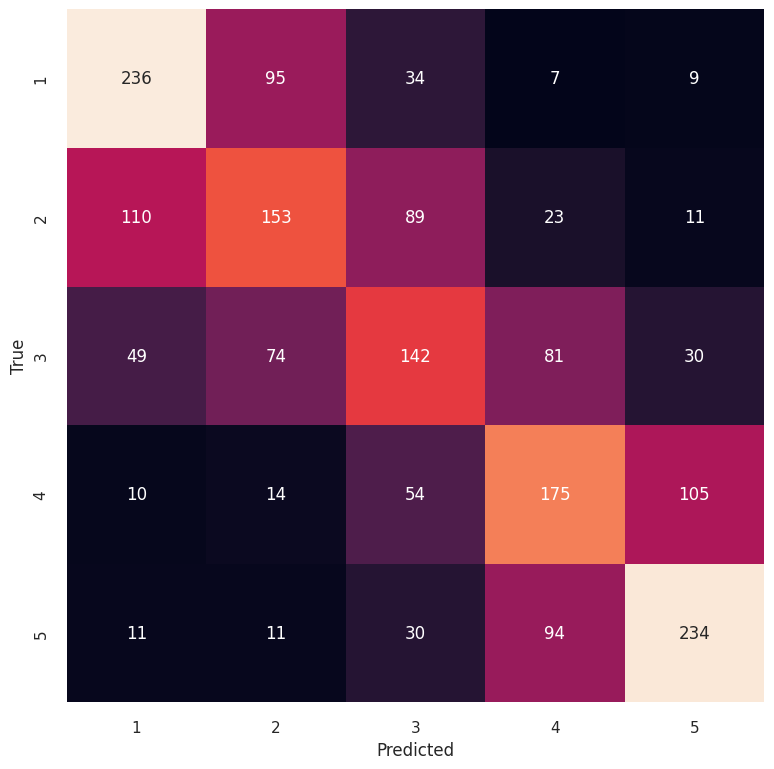

In [ ]:
best_model.conf_matrix()

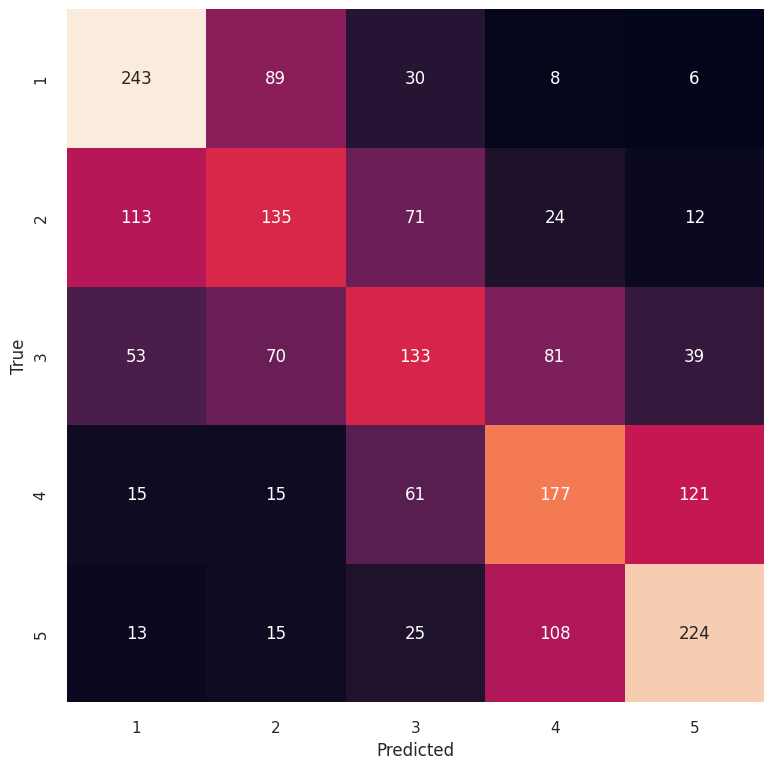

In [ ]:
best_model.test_conf_matrix()

Observations:

The adjacent squares of the diagonal going across the confusion matrix, shows that the model's second highest prediction, for a given class (review score) is always a review score that is +- the true score. Very few reviews that have a score of 5, have been predicted to have a score of 1 or 2. This is very relieving to know, the majority of the error for the model, is no different to the error a human may make classifying a review to a score with a scale of 1-5.

### **4.3 Saving Models**

Saving the best classifiers to drive.

In [ ]:
# Using pickle to dump models

for model in [dec_tree_2, ran_for_3, log_reg_1, svm_2, gnb_2, knn_2, adaboost_2, xgboost_1, voting, stacking]:
    pickle.dump(model, open(path + f'/{model.model_type}.pkl', 'wb'))

### **4.4 Applying Neural Networks**

In [ ]:
# Loading the dataset

file_path = "/content/drive/MyDrive/Dataset/Hilton Hotel London Reviews/hotel_reviews_structured.csv"
path = "/content/drive/MyDrive/Dataset/Hilton Hotel London Reviews"

reviews_data_2 = pd.read_csv(file_path)
reviews_data_2.head()

hotel_name                   review_summary  \
0  Hotel Hilton London Gatwick Airport                         Awful...   
1              Hilton London Metropole                        Terrible    
2                 Hilton London Euston   Double deposit taken from bank   
3              Hilton London Metropole              Super disappointed!   
4              Hilton London Metropole  Dissatisfied Hilton gold number   

                                              review  score  
0  Its hard to find words that can describe this ...      1  
1  Absolutely terrible. Cracked ceiling, tiny roo...      1  
2  Very disappointed firstly i checked in online ...      1  
3  First of all we arrived wanting to park at the...      1  
4  Hello,  I currently staying @ Hilton Metropole...      1

In [ ]:
# OHE the rating score

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(reviews_data_2[["score"]]).toarray())

reviews_data_2 = reviews_data_2.join(enc_df)
reviews_data_2.head()

hotel_name                   review_summary  \
0  Hotel Hilton London Gatwick Airport                         Awful...   
1              Hilton London Metropole                        Terrible    
2                 Hilton London Euston   Double deposit taken from bank   
3              Hilton London Metropole              Super disappointed!   
4              Hilton London Metropole  Dissatisfied Hilton gold number   

                                              review  score    0    1    2  \
0  Its hard to find words that can describe this ...      1  1.0  0.0  0.0   
1  Absolutely terrible. Cracked ceiling, tiny roo...      1  1.0  0.0  0.0   
2  Very disappointed firstly i checked in online ...      1  1.0  0.0  0.0   
3  First of all we arrived wanting to park at the...      1  1.0  0.0  0.0   
4  Hello,  I currently staying @ Hilton Metropole...      1  1.0  0.0  0.0   

     3    4  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0

In [ ]:
# Renaming the features

reviews_data_2 = reviews_data_2.rename(columns={0: "score_1", 1: "score_2", 2:"score_3", 3:"score_4", 4:"score_5"})
reviews_data_2.head()

hotel_name                   review_summary  \
0  Hotel Hilton London Gatwick Airport                         Awful...   
1              Hilton London Metropole                        Terrible    
2                 Hilton London Euston   Double deposit taken from bank   
3              Hilton London Metropole              Super disappointed!   
4              Hilton London Metropole  Dissatisfied Hilton gold number   

                                              review  score  score_1  score_2  \
0  Its hard to find words that can describe this ...      1      1.0      0.0   
1  Absolutely terrible. Cracked ceiling, tiny roo...      1      1.0      0.0   
2  Very disappointed firstly i checked in online ...      1      1.0      0.0   
3  First of all we arrived wanting to park at the...      1      1.0      0.0   
4  Hello,  I currently staying @ Hilton Metropole...      1      1.0      0.0   

   score_3  score_4  score_5  
0      0.0      0.0      0.0  
1      0.0      0.0      0.0  
2      0.0      0.0      0.0  
3      0.0      0.0      0.0  
4      0.0      0.0      0.0

In [ ]:
# Applying train and test split

x_train, x_test, y_train, y_test = train_test_split(reviews_data_2[["review", "review_summary"]],
                                                    reviews_data_2[["score_1", "score_2", "score_3", "score_4", "score_5"]],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
# Saving the df to drive in csv

y_test.to_csv(path + 'y_test_ohe.csv', index=False)
y_train.to_csv(path + 'y_train_ohe.csv', index=False)

In [ ]:
# Function to add the word "sum"(summary) to tokens

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

def add_sum_suffix(text):

    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        word = word + '_sum'
        new_text += word + ' '

    return new_text

In [ ]:
# Add Suffix to the Review Summary to distinguish from reviews

x_train["review_summary_suffixed"] = x_train["review_summary"].apply(add_sum_suffix)
x_test["review_summary_suffixed"] = x_test["review_summary"].apply(add_sum_suffix)

In [ ]:
# Functions to Tokenize words

def text_cleanup(text):

    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        new_text += word + ' '

    return new_text

In [ ]:
x_train["review_cleaned"] = x_train["review"].apply(text_cleanup)
x_test["review_cleaned"] = x_test["review"].apply(text_cleanup)
x_train.head()

review  \
9048  We booked a family room with British airways. ...   
1219  After 3 hours waiting for chosen room booked o...   
6901  I travelled to London on 22nd December, 2013. ...   
5466  A very big hotel perfect for big Business Even...   
6107  Me and a friend stayed at the Metropole for fi...   

                         review_summary  \
9048                         Very good.   
1219  Don't bother with online check-in   
6901                     General review   
5466       Old but very friendly Staff!   
6107                Two Stays, One Trip   

                                review_summary_suffixed  \
9048                                 very_sum good_sum    
1219  don_sum t_sum bother_sum with_sum online_sum c...   
6901                            general_sum review_sum    
5466   old_sum but_sum very_sum friendly_sum staff_sum    
6107                two_sum stays_sum one_sum trip_sum    

                                         review_cleaned  
9048  we booked a family room with british airways w...  
1219  after hours waiting for chosen room booked onl...  
6901  i travelled to london on nd december i stayed ...  
5466  a very big hotel perfect for big business even...  
6107  me and a friend stayed at the metropole for fi...

In [ ]:
# Creating a list of tokens for reviews

flat_review = " ".join(x_train["review_cleaned"].values)
flat_review = flat_review.lower().split()
len(flat_review)

736267

In [ ]:
# Creating a list of tokens for review summary

flat_review_summary = " ".join(x_train["review_summary_suffixed"].values)
flat_review_summary = flat_review_summary.lower().split()
len(flat_review_summary)

33423

In [ ]:
# Creating a list unique tokens from reviews and reviews summary

unique_list = []
for word in flat_review:
    if word not in unique_list:
        unique_list.append(word)
for word in flat_review_summary:
    if word not in unique_list:
        unique_list.append(word)

len(unique_list)

17450

In [ ]:
# Creating a Dictionary With Words That Appear in Reviews and an Index
word_index_dict = {}

for i in range(0, len(unique_list)):
    word_index_dict[unique_list[i]] = i+4

# Adding 4 other items to the dictionary that represented padding, the start of the review, unknown words, and unused words.

word_index_dict['<PAD>'] = 0
word_index_dict['<START>'] = 1
word_index_dict['<UNK>'] = 2
word_index_dict['<UNUSED>'] = 3

In [ ]:
# Function to Index Words in Reviews Using Dictionary

def index_review_words(text):
    review_word_list = []
    for word in text.lower().split():
        if word in word_index_dict.keys():
            review_word_list.append(word_index_dict[word])
        else:
            review_word_list.append(word_index_dict['<UNK>'])

    return review_word_list

In [ ]:
# Indexing Words in Reviews Using Dictionary

x_train["preprocessed_review"] = x_train["review_cleaned"].apply(index_review_words)
x_test["preprocessed_review"] = x_test["review_cleaned"].apply(index_review_words)

x_train["preprocessed_review_summary"] = x_train["review_summary_suffixed"].apply(index_review_words)
x_test["preprocessed_review_summary"] = x_test["review_summary_suffixed"].apply(index_review_words)

In [ ]:
# Combining Indexed Review Summary and Indexed Review Into a Single Column

x_train["all_preprocessed_review"] = x_train["preprocessed_review"] + x_train["preprocessed_review_summary"]
x_test["all_preprocessed_review"] = x_test["preprocessed_review"] + x_test["preprocessed_review_summary"]

x_train.head()

review  \
9048  We booked a family room with British airways. ...   
1219  After 3 hours waiting for chosen room booked o...   
6901  I travelled to London on 22nd December, 2013. ...   
5466  A very big hotel perfect for big Business Even...   
6107  Me and a friend stayed at the Metropole for fi...   

                         review_summary  \
9048                         Very good.   
1219  Don't bother with online check-in   
6901                     General review   
5466       Old but very friendly Staff!   
6107                Two Stays, One Trip   

                                review_summary_suffixed  \
9048                                 very_sum good_sum    
1219  don_sum t_sum bother_sum with_sum online_sum c...   
6901                            general_sum review_sum    
5466   old_sum but_sum very_sum friendly_sum staff_sum    
6107                two_sum stays_sum one_sum trip_sum    

                                         review_cleaned  \
9048  we booked a family room with british airways w...   
1219  after hours waiting for chosen room booked onl...   
6901  i travelled to london on nd december i stayed ...   
5466  a very big hotel perfect for big business even...   
6107  me and a friend stayed at the metropole for fi...   

                                    preprocessed_review  \
9048  [4, 5, 6, 7, 8, 9, 10, 11, 4, 12, 13, 14, 15, ...   
1219  [38, 39, 40, 36, 41, 8, 5, 42, 43, 44, 9, 45, ...   
6901  [95, 96, 69, 97, 98, 99, 100, 95, 101, 61, 102...   
5466  [6, 128, 14, 125, 31, 36, 14, 174, 175, 58, 17...   
6107  [190, 16, 6, 191, 101, 192, 50, 103, 36, 193, ...   

                            preprocessed_review_summary  \
9048                                     [14525, 14526]   
1219  [14527, 14528, 14529, 14530, 14531, 14532, 14533]   
6901                                     [14534, 14535]   
5466                [14536, 14537, 14525, 14538, 14539]   
6107                       [14540, 14541, 14542, 14543]   

                                all_preprocessed_review  
9048  [4, 5, 6, 7, 8, 9, 10, 11, 4, 12, 13, 14, 15, ...  
1219  [38, 39, 40, 36, 41, 8, 5, 42, 43, 44, 9, 45, ...  
6901  [95, 96, 69, 97, 98, 99, 100, 95, 101, 61, 102...  
5466  [6, 128, 14, 125, 31, 36, 14, 174, 175, 58, 17...  
6107  [190, 16, 6, 191, 101, 192, 50, 103, 36, 193, ...

In [ ]:
# Adding Padding to Reviews and Capping Reviews to Length 250 Words

x_train = sequence.pad_sequences(x_train["all_preprocessed_review"], value=word_index_dict['<PAD>'], padding='post', maxlen=250)
x_test = sequence.pad_sequences(x_test["all_preprocessed_review"], value=word_index_dict['<PAD>'], padding='post', maxlen=250)

In [ ]:
# Saving test data

np.save(path + '/6.x_test', x_test)

In [ ]:
# Creating validation set

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### **4.4.1 Applying ANNs**

Applying MLP for 5-class classification.

In [ ]:
# Creating and Training Neural Network Model
# Creating a neural network model with 1 embedding layer for the 17213 unique words (including the extra 4 from padding etc.),
# 1 dense layer with 16 nodes, and one output layer with 5 nodes for each score.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Creating the neural network model
model = Sequential()
model.add(Embedding(17217, 20))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# 1. Get actual vocabulary size
vocab_size = len(word_index_dict)
print(f"Vocabulary size: {vocab_size}")

# 2. Verify max index in data
max_index = np.max(x_train)
print(f"Max index in training data: {max_index}")

# 3. Handle out-of-vocabulary indices
x_train = np.where(x_train >= vocab_size, word_index_dict['<UNK>'], x_train)
x_val = np.where(x_val >= vocab_size, word_index_dict['<UNK>'], x_val)

# 4. Build model with correct vocabulary size
model = Sequential()
model.add(Embedding(input_dim=vocab_size+1, output_dim=20))  # +1 for safety
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=250,
                    validation_data=(x_val, y_val),
                    verbose=1)

Vocabulary size: 17454
Max index in training data: 17453
Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2016 - loss: 1.6088 - val_accuracy: 0.2100 - val_loss: 1.6054
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2215 - loss: 1.6049 - val_accuracy: 0.2731 - val_loss: 1.5988
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2679 - loss: 1.5981 - val_accuracy: 0.2804 - val_loss: 1.5880
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2745 - loss: 1.5864 - val_accuracy: 0.2870 - val_loss: 1.5734
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2911 - loss: 1.5697 - val_accuracy: 0.3010 - val_loss: 1.5580
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3005 - loss: 1.5499 - val_accuracy: 0.3136 - val_loss: 1.5318
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3325 - loss: 1.5241 - val_accuracy: 0.3123 - val_loss: 1.5048
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - a

In [ ]:
# Training the model

fitModel = model.fit(x_train, y_train, epochs=60, batch_size=250, validation_data=(x_val, y_val), verbose=0)

In [ ]:
# Evaluating validation accuracy

model.evaluate(x_val, y_val)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5467 - loss: 1.1636


[1.1439951658248901, 0.5521594882011414]

In [ ]:
# Evaluating testing accuracy

model.evaluate(x_test, y_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5458 - loss: 1.1582


[1.1329948902130127, 0.5528973937034607]

In [ ]:
# Reverse encoding

def reverse_encode(y_df):

    y_df['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)
    for i in range(0,len(y_df)):
        if y_df.iloc[i,-1] == 'score_1':
            y_df.iloc[i,-1] = 1
        elif y_df.iloc[i,-1] == 'score_2':
            y_df.iloc[i,-1] = 2
        elif y_df.iloc[i,-1]== 'score_3':
            y_df.iloc[i,-1] = 3
        elif y_df.iloc[i,-1]== 'score_4':
            y_df.iloc[i,-1] = 4
        elif y_df.iloc[i,-1] == 'score_5':
            y_df.iloc[i,-1]= 5


def add_one_argmax_score(x):
    x = x+1
    return x

def conf_matrix(cm):

    plt.figure(figsize=(9, 9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[1,2,3,4,5],
                     yticklabels=[1,2,3,4,5])
    ax.set(xlabel='Predicted', ylabel='True')
    plt.show()

In [ ]:
reverse_encode(y_test)

reverse_encode(y_val)

y_test_predicted = add_one_argmax_score(np.argmax(model.predict(x_test), axis=1))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


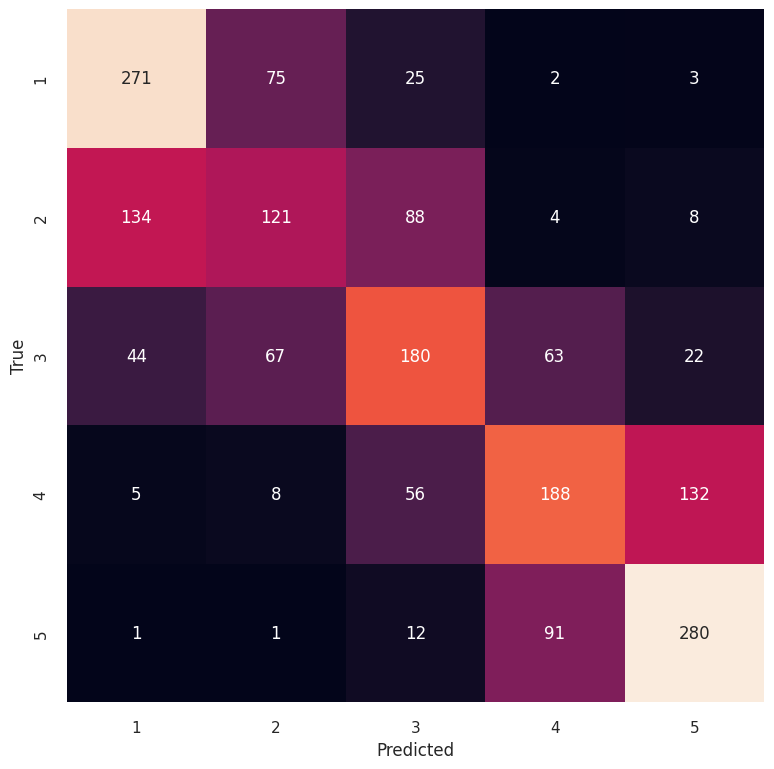

In [ ]:
# Creating Confusion Matrix for Test Data

test_cm = confusion_matrix(y_test["score"].tolist(), y_test_predicted)
conf_matrix(test_cm)

Observations:

1. Most of the error is occuring within close ranges.

In [ ]:
# Saving the model

model.save(path + '/Neural_Network.keras')
pickle.dump(word_index_dict,open(path + '/word_index_dict.pkl','wb'))

#### **4.4.2 Applying LSTMs**

Applying Bi-directional LSTMs.

In [ ]:
sent_len = 250
vector_embedding_len = 40
voc_size = len(word_index_dict.keys())

In [ ]:
# Creating a neural network model with 1 embedding layer for the 17213 unique words (including the extra 4 from padding etc.),
# 1 dense layer with 16 nodes, and one output layer with 5 nodes for each score.

model1 = Sequential()
model1.add(Embedding(voc_size, vector_embedding_len, input_length=sent_len))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(5, activation='softmax'))

In [ ]:
# Compiling the model

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train_f = np.asarray(y_train.values).astype(np.float32)
y_val_f = np.asarray(y_val.drop("score", axis=1).values).astype(np.float32)
y_test_f = np.asarray(y_test.drop("score", axis=1).values).astype(np.float32)

In [ ]:
# Training the model

fitModel = model1.fit(x_train, y_train_f, epochs=60, batch_size=250, validation_data=(x_val, y_val_f))

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.2069 - loss: 1.6094 - val_accuracy: 0.2126 - val_loss: 1.6029
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2783 - loss: 1.5419 - val_accuracy: 0.3827 - val_loss: 1.3330
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3411 - loss: 1.3888 - val_accuracy: 0.3262 - val_loss: 1.4986
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.3676 - loss: 1.4319 - val_accuracy: 0.4133 - val_loss: 1.2160
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4386 - loss: 1.1802 - val_accuracy: 0.4472 - val_loss: 1.1940
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4976 - loss: 1.0826 - val_accuracy: 0.4698 - val_loss: 1.1365
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5482 - loss: 0.9931 - val_accuracy: 0.4963 - val_loss: 1.1041
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5812 - loss: 0.9136 - val_accuracy: 0.4957 - val_loss:

In [ ]:
# Evaluating validation accuracy

model1.evaluate(x_val, y_val_f)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.4516 - loss: 3.4394


[3.4160337448120117, 0.46046510338783264]

In [ ]:
# Evaluating testing accuracy

model1.evaluate(x_test, y_test_f)

59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5053 - loss: 3.1201


[3.1069154739379883, 0.5066453814506531]

59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step


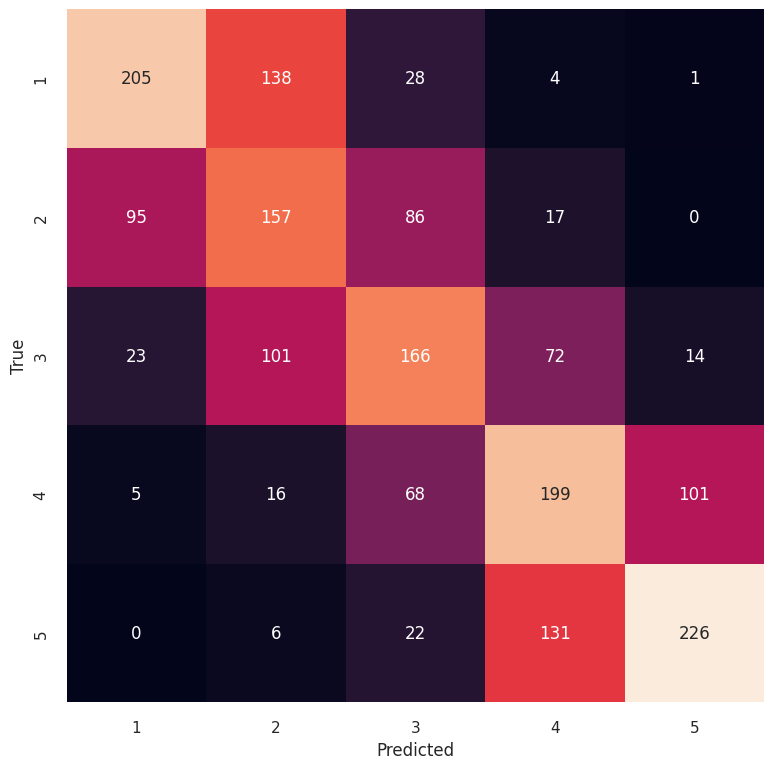

In [ ]:
# Creating Confusion Matrix for Test Data

y_test_predicted = add_one_argmax_score(np.argmax(model1.predict(x_test), axis=1))
test_cm = confusion_matrix(y_test["score"].tolist(), y_test_predicted)
conf_matrix(test_cm)

In [ ]:
# Saving the model
model.save(path + '/BidirectionalLSTM.keras')

### 5. Conclusion
---
The project built and tested several machine learning and deep learning models to classify the sentiment of Hilton Hotel London reviews on a 1–5 scale. The goal was to create a system that measures guest perception automatically, helping the hotel spot negative feedback early and act on it.

#### *Findings and Outcomes*

1. **Data Preparation:** The raw scraped data required heavy cleaning. Duplicate reviews were removed, multi-part reviews were merged, and severe class imbalance was handled with under-sampling. This balance was critical to avoid bias toward the majority of positive reviews.

2. **Exploratory Analysis:**

   * Reviews were strongly skewed toward positive scores (4–5).
   * Sentiment varied by hotel. For example, Hilton London Metropole received more negative reviews compared to Hilton London Gatwick Airport.
   * Frequent words such as “not,” “clean,” “poor,” and “great” confirmed that review text carried clear sentiment signals for modeling.

3. **Model Performance:**

   * Logistic Regression stood out among traditional ML models. It reached 47–48% validation accuracy with minimal overfitting.
   * Errors were close to the true score, often off by only one point, which builds trust in predictions. Extreme misclassifications were rare.

4. **Deep Learning Exploration:** Feedforward and Bidirectional LSTM models were also tested. While they showed potential, they did not outperform Logistic Regression. For this dataset, the simpler model proved both effective and easier to interpret.

5. **Business Objectives Met:**

   * The final model automatically classifies reviews into 1–5 scores.
   * It flags negative reviews (1–2) for quick action.
   * Tracking these reviews over time helps measure the effect of service or facility changes.

This project shows how NLP and machine learning can turn raw guest feedback into practical insights. Hilton can use this system to improve service quality, strengthen brand reputation, and build long-term customer loyalty.

